# ĐỀ TÀI: ỨNG DỤNG PCA ĐỂ CẢI THIỆN MÔ HỒI HỒI QUY TUYẾN TÍNH


- **Dataset**: Ames Housing Dataset

### Mục tiêu
Đề tài này tập trung vào việc áp dụng Phân tích Thành phần Chính (PCA) để giảm chiều dữ liệu, từ đó cải thiện mô hình Hồi quy Tuyến tính trong bài toán dự đoán giá nhà. Chúng ta sẽ xây dựng và so sánh hiệu suất của mô hình trước và sau khi áp dụng PCA để đánh giá tác động của kỹ thuật này một cách toàn diện, từ tiền xử lý dữ liệu đến phân tích kết quả.

## Phần 1: Giới thiệu Đề tài và Khám phá Dữ liệu

### 1.1. Giới thiệu

**Mục tiêu Đề tài:**
Đề tài này tập trung vào việc áp dụng Phân tích Thành phần Chính (PCA) như một kỹ thuật tiền xử lý và giảm chiều dữ liệu. Mục tiêu chính là để đánh giá xem việc sử dụng PCA có giúp cải thiện hiệu suất và sự ổn định của mô hình Hồi quy Tuyến tính trong bài toán dự đoán giá nhà hay không.

**Bộ dữ liệu sử dụng:**
Để thực hiện mục tiêu này, chúng ta sẽ sử dụng **Bộ dữ liệu Ames Housing** – một bộ dữ liệu kinh điển và phức tạp từ Ames, Iowa, Hoa Kỳ. Bộ dữ liệu này là một ví dụ lý tưởng cho đề tài của chúng ta vì các lý do sau:

* **Số lượng Mẫu và Đặc trưng Lớn:** Với **2,930 mẫu** và **81 đặc trưng** (bao gồm cả biến mục tiêu `SalePrice`), bộ dữ liệu có số chiều cao, là điều kiện lý tưởng để thấy rõ hiệu quả của PCA.
* **Kiểu dữ liệu Phức hợp:** Bao gồm cả biến số (numerical) và biến phân loại (categorical), đòi hỏi một quy trình tiền xử lý kỹ lưỡng.
* **Tồn tại các Vấn đề Dữ liệu thực tế:** Dữ liệu chứa các giá trị thiếu (missing values), ngoại lệ (outliers), và hiện tượng đa cộng tuyến, là những kịch bản mà PCA được kỳ vọng sẽ giải quyết tốt.

### 1.2. Khám phá Dữ liệu Ban đầu

Bây giờ, chúng ta sẽ tiến hành tải và thực hiện các bước khám phá ban đầu để xác nhận lại các đặc điểm trên và có cái nhìn tổng quan về dữ liệu.

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập định dạng hiển thị cho plots
sns.set_style('whitegrid')
plt.rc('figure', figsize=(9, 6))
plt.rc('font', size=9)

# Tải dữ liệu từ file CSV
df = pd.read_csv("/content/sample_data/AmesHousing.csv")

# Hiển thị 5 dòng dữ liệu đầu tiên
print("\n5 dòng dữ liệu đầu tiên:")
display(df.head())

# Hiển thị thông tin tổng quan về các cột
print("\nThông tin tổng quan về các cột:")
df.info()

# Hiển thị thống kê mô tả cho các cột số
print("\nThống kê mô tả cho các cột số:")
display(df.describe())


5 dòng dữ liệu đầu tiên:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



Thông tin tổng quan về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


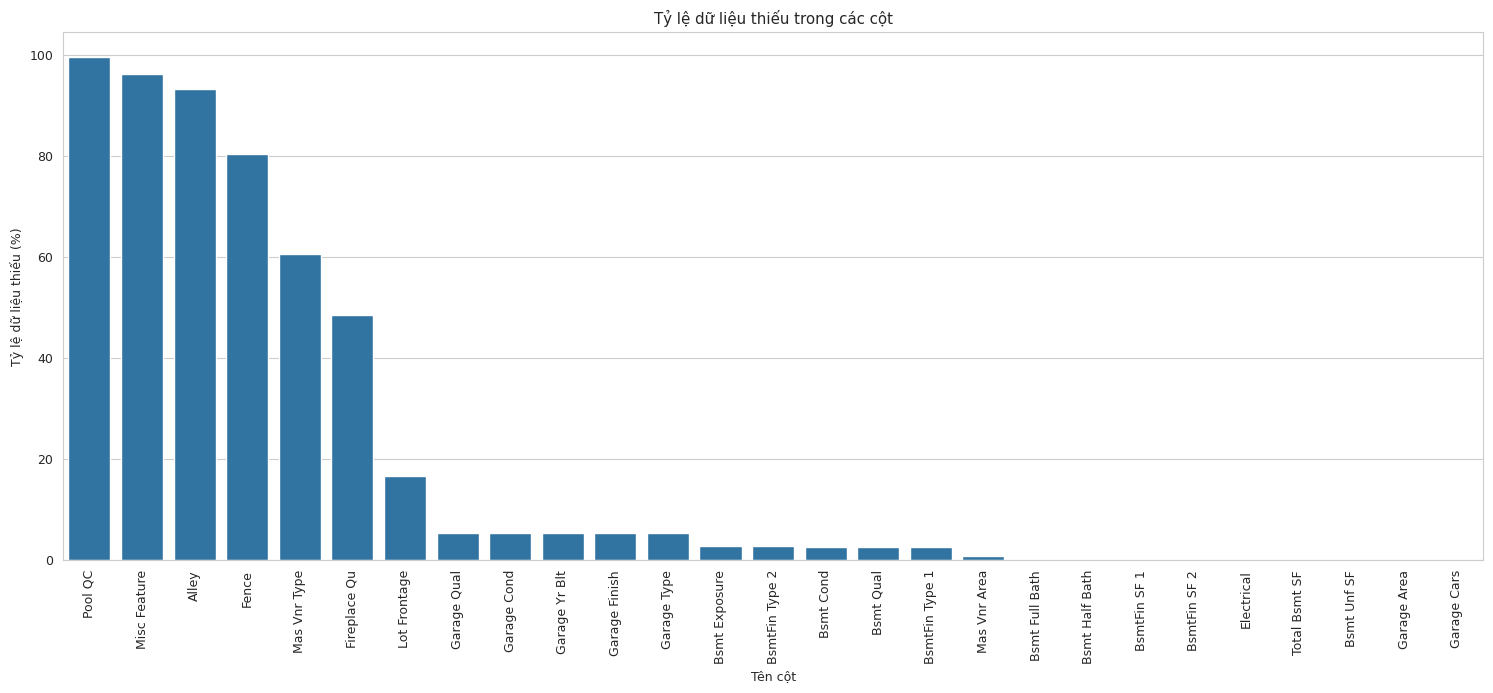

In [ ]:
# Tính toán tỷ lệ phần trăm dữ liệu thiếu cho mỗi cột
missing_percentage = df.isnull().sum() / len(df) * 100

# Lọc ra các cột có dữ liệu thiếu và sắp xếp giảm dần
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Tạo biểu đồ cột để trực quan hóa dữ liệu thiếu
plt.figure(figsize=(15, 7))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.xlabel("Tên cột")
plt.ylabel("Tỷ lệ dữ liệu thiếu (%)")
plt.title("Tỷ lệ dữ liệu thiếu trong các cột")
plt.tight_layout()
plt.show()

**Nhận xét sau khi Khám phá Dữ liệu (Ames Housing):**

*   **Dữ liệu phức tạp:** Bộ dữ liệu bao gồm 2930 dòng và 82 cột, cho thấy sự đa dạng và quy mô phù hợp để áp dụng các kỹ thuật giảm chiều như PCA.
*   **Nhiều giá trị thiếu:** Quan sát từ `df.info()` cho thấy nhiều cột chứa đáng kể các giá trị thiếu (ví dụ: Lot Frontage, Alley, Fireplace Qu, Pool QC). Việc xử lý các giá trị thiếu này sẽ là một bước quan trọng trong quá trình tiền xử lý dữ liệu.
*   **Kiểu dữ liệu hỗn hợp:** Dữ liệu bao gồm cả các cột dạng số (int64, float64) và cột dạng đối tượng (object). Điều này đòi hỏi chúng ta phải thực hiện các bước mã hóa (encoding) phù hợp cho các biến phân loại trước khi đưa vào mô hình.

Tiếp theo, chúng ta sẽ tiến hành các bước Tiền xử lý và Làm sạch Dữ liệu một cách hệ thống để chuẩn bị dữ liệu cho việc xây dựng mô hình.

## Phần 2: Tiền xử lý Dữ liệu cơ bản

Ở phần này, chúng ta sẽ thực hiện các bước làm sạch và mã hóa nền tảng để chuyển đổi bộ dữ liệu thô thành một bộ dữ liệu hoàn toàn ở dạng số, sẵn sàng cho giai đoạn phân tích sâu. Các bước cụ thể bao gồm:

**1. Xử lý Giá trị thiếu (Missing Values):** Chúng ta tiếp cận một cách logic, không áp dụng một phương pháp cho tất cả.
* **Loại bỏ các dòng thiếu đơn lẻ**: Với các cột quan trọng nhưng chỉ thiếu 1-2 giá trị (`Electrical`, `Bsmt Full Bath`,...), ta sẽ loại bỏ trực tiếp các dòng này để đảm bảo tính toàn vẹn của dữ liệu.
* **Loại bỏ các cột có tỷ lệ thiếu quá cao**: Các cột không thể khôi phục một cách đáng tin cậy do có trên 80% giá trị bị thiếu (`Alley`, `Pool QC`, `Fence`, `Misc Feature`, `Misc Val`) sẽ bị loại bỏ.
* **Điền giá trị dựa trên logic nghiệp vụ**: Với các trường hợp mà `NaN` có ý nghĩa là 'không tồn tại' (ví dụ: không có garage, không có tầng hầm), ta sẽ điền giá trị `0` cho các cột số và `'None'` cho các cột phân loại.
* **Điền giá trị thống kê**: Sử dụng giá trị trung vị (median) để điền cho các cột số như `Lot Frontage`.

**2. Kiểm tra Dữ liệu Trùng lặp:**
* Thực hiện kiểm tra để đảm bảo không có dòng dữ liệu nào bị trùng lặp hoàn toàn, một bước cần thiết để đảm bảo chất lượng dữ liệu.

**3. Mã hóa Dữ liệu (Data Encoding):** Mục tiêu là chuyển đổi toàn bộ dữ liệu dạng chữ sang dạng số mà mô hình có thể hiểu được, sử dụng chiến lược đa tầng:
* **Mã hóa có thứ tự (Ordinal Encoding)**: Sử dụng phương pháp ánh xạ thủ công (`map`) cho các đặc trưng có tính hơn kém rõ ràng (ví dụ: Chất lượng `Exter Qual`: Ex=5, Gd=4,...) để bảo toàn thông tin quan trọng về thứ hạng.
* **Mã hóa thủ công các biến khác**: Sử dụng một từ điển `replace` lớn và chi tiết để ánh xạ các giá trị chữ sang số cho nhiều cột phân loại khác theo logic đã phân tích trong file gốc.
* **Mã hóa One-Hot (One-Hot Encoding)**: Sử dụng hàm `pd.get_dummies` như một bước cuối cùng để xử lý các cột phân loại còn lại (nếu có), đảm bảo toàn bộ dữ liệu đều ở dạng số.

### 2.1. Xử lý Giá trị thiếu (Missing Values)

Chúng ta sẽ tiếp cận việc xử lý giá trị thiếu một cách có chiến lược, dựa trên bản chất của từng cột.

In [ ]:
# Tạo một bản sao để không ảnh hưởng đến DataFrame gốc
df_processed = df.copy()

# In ra các cột có giá trị thiếu TRƯỚC KHI xử lý
print("--- TRƯỚC KHI XỬ LÝ ---")
missing_before = df_processed.isnull().sum()
print(missing_before[missing_before > 0].sort_values(ascending=False))

# Xử lý các dòng có giá trị thiếu nhưng số lượng ít
df_processed.dropna(subset=['Bsmt Full Bath', 'Garage Cars', 'Electrical'], inplace=True)

# Xử lý các cột số (numerical) bị thiếu
df_processed.fillna({'Mas Vnr Area': 0}, inplace=True)
df_processed['Garage Yr Blt'] = df_processed['Garage Yr Blt'].fillna(df_processed['Year Built'])
df_processed.fillna({'Lot Frontage': df_processed['Lot Frontage'].median()}, inplace=True)

# Xử lý các cột dạng chữ (categorical) bị thiếu
df_processed.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val'], inplace=True)
none_columns = ['Mas Vnr Type','Fireplace Qu', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df_processed[none_columns]= df_processed[none_columns].fillna('None')

# In ra các cột có giá trị thiếu SAU KHI xử lý
print("\n--- SAU KHI XỬ LÝ ---")
missing_after = df_processed.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

if remaining_missing.empty:
    print("Thành công! Tất cả các giá trị thiếu đã được xử lý.")
else:
    print("Các cột còn lại giá trị thiếu:")
    print(remaining_missing)

--- TRƯỚC KHI XỬ LÝ ---
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64

--- SAU KHI XỬ LÝ ---
Thành công! Tất cả các giá trị thiếu đã được xử lý.


### 2.2. Kiểm tra Dữ liệu Trùng lặp
Một bước quan trọng để đảm bảo tính toàn vẹn của dữ liệu là kiểm tra và loại bỏ các dòng bị trùng lặp hoàn toàn.

In [ ]:
# Kiểm tra dữ liệu trùng lặp
duplicates = df_processed.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("Không tìm thấy dòng dữ liệu nào bị trùng lặp.")
else:
    print(f"Tìm thấy {num_duplicates} dòng bị trùng lặp.")

Không tìm thấy dòng dữ liệu nào bị trùng lặp.


### 2.3. Mã hóa Dữ liệu (Data Encoding)

Sử dụng phương pháp mã hóa thủ công chi tiết để chuyển đổi các đặc trưng phân loại sang dạng số, bảo toàn tối đa ý nghĩa và thứ tự của dữ liệu.

In [ ]:
# 1. Mã hóa các cột có tính thứ tự (rating)
rating_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']
# Loại trừ 'Bsmt Exposure' nếu có trong list vì nó có thang đo riêng
if 'Bsmt Exposure' in rating_cols:
    rating_cols.remove('Bsmt Exposure')
for col in rating_cols:
    df_processed[col] = df_processed[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

# 2. Mã hóa các cột phân loại khác bằng từ điển 'replace' lớn
df_processed = df_processed.replace({
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "BldgType" : {"1Fam" : 1, "2fmCon" : 2, "Duplex" : 3, "Twnhs" : 4, "TwnhsE": 4}, # Gộp Twnhs và TwnhsE
    "HouseStyle" : {"1Story" : 1, "1.5Fin" : 2, "1.5Unf" : 3, "2Story" : 4, "2.5Fin" : 5, "2.5Unf" : 6, "SFoyer" : 7, "SLvl" : 8},
    "BsmtExposure" : {"None": 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4}, # Xử lý NA trong file gốc của bạn, ở đây là 'None'
    "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
    "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
    "Central Air" : {"N" : 0, "Y" : 1},
    "Electrical" : {"SBrkr" : 4, "FuseA" : 3, "FuseF" : 2, "FuseP" : 1, "Mix" : 5, "None": 0},
    "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
    "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
})

# 3. Với các cột object còn sót lại, áp dụng One-Hot Encoding
object_cols_left = df_processed.select_dtypes(include=['object']).columns
if len(object_cols_left) > 0:
    print(f"Các cột object còn lại sẽ được One-Hot Encode: {list(object_cols_left)}")
    df_processed = pd.get_dummies(df_processed, columns=object_cols_left, dtype=float)
else:
    print("Tất cả các cột đã được mã hóa thủ công hoặc đã là số.")

print("Mã hóa dữ liệu hoàn tất.")
print(f"Kích thước dữ liệu sau khi mã hóa: {df_processed.shape}")
print("Kiểu dữ liệu của 5 cột đầu tiên sau khi mã hóa:")
print(df_processed.dtypes.head())

Các cột object còn lại sẽ được One-Hot Encode: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Sale Type', 'Sale Condition']
Mã hóa dữ liệu hoàn tất.
Kích thước dữ liệu sau khi mã hóa: (2926, 247)
Kiểu dữ liệu của 5 cột đầu tiên sau khi mã hóa:
Order             int64
PID               int64
MS SubClass       int64
Lot Frontage    float64
Lot Area          int64
dtype: object


## Phần 3: Phân tích Khám phá và Tinh chỉnh Đặc trưng (EDA)

Sau khi có một bộ dữ liệu sạch ở dạng số từ Phần 2, chúng ta sẽ thực hiện phân tích khám phá sâu để hiểu rõ hơn về mối quan hệ giữa các biến, tìm ra các đặc trưng quan trọng và tinh chỉnh lại bộ dữ liệu lần cuối trước khi xây dựng mô hình. Các bước bao gồm:

1.  **Phân tích Tương quan:**
    * Loại bỏ các cột định danh và không phù hợp: Các cột như `Order`, `PID` (cột định danh) và `MS SubClass` (cột phân loại dưới dạng số, có thể gây nhiễu cho mô hình tuyến tính nếu không được xử lý đặc biệt) sẽ được loại bỏ khỏi bộ dữ liệu.
    * Tính toán ma trận tương quan giữa các đặc trưng và biến mục tiêu `SalePrice`.
    * Trực quan hóa mối quan hệ của **top 15 đặc trưng quan trọng nhất** bằng biểu đồ nhiệt (heatmap) để dễ dàng xác định các biến có ảnh hưởng lớn và hiện tượng đa cộng tuyến.

2.  **Phân tích và Loại bỏ Ngoại lệ Thủ công:**
    * Dựa trên trực quan hóa (biểu đồ và mức độ tương quan đặc trưng có ảnh hưởng mạnh nhất đến `SalePrice` trở xuống), tiến hành phân tích và loại bỏ các điểm dữ liệu ngoại lệ một cách thủ công để tăng tính ổn định và độ chính xác cho mô hình.

3.  **Phân tích Thống kê và Phân phối:**
    * Đi sâu vào việc phân tích các đặc trưng hàng đầu bằng cách tính toán các chỉ số thống kê mô tả (trung bình, độ lệch, độ nhọn...) và trực quan hóa phân phối của chúng bằng biểu đồ histogram và violin.

4.  **Xử lý Độ lệch (Skewness):**
    * Xác định các đặc trưng có phân phối bị lệch và áp dụng phép biến đổi log (`log1p`) để đưa chúng về gần với phân phối chuẩn. Bước này cũng được áp dụng cho biến mục tiêu `SalePrice` để cải thiện hiệu suất và sự ổn định của mô hình hồi quy.

5.  **Hoàn thiện bộ Dữ liệu:**
    * Tạo ra bộ dữ liệu cuối cùng (`X_final`, `y_final`) bằng cách loại bỏ các cột định danh và các cột không cần thiết khác (`Order`, `PID`, `MS SubClass`), sẵn sàng cho giai đoạn mô hình hóa.

### 3.1. Phân tích Tương quan: Tìm các Đặc trưng Tiềm năng

Bước đầu tiên trong EDA là xác định các đặc trưng có mối quan hệ tuyến tính mạnh nhất với biến mục tiêu `SalePrice`.

--- Top 15 đặc trưng có tương quan cao nhất với SalePrice ---
SalePrice         1.000000
Overall Qual      0.799841
Gr Liv Area       0.707492
Exter Qual        0.698490
Kitchen Qual      0.672890
Garage Cars       0.647822
Garage Area       0.640199
Total Bsmt SF     0.634287
1st Flr SF        0.623731
Bsmt Qual         0.611201
Year Built        0.558888
Full Bath         0.545314
Garage Yr Blt     0.540826
Fireplace Qu      0.533463
Year Remod/Add    0.532906
Name: SalePrice, dtype: float64


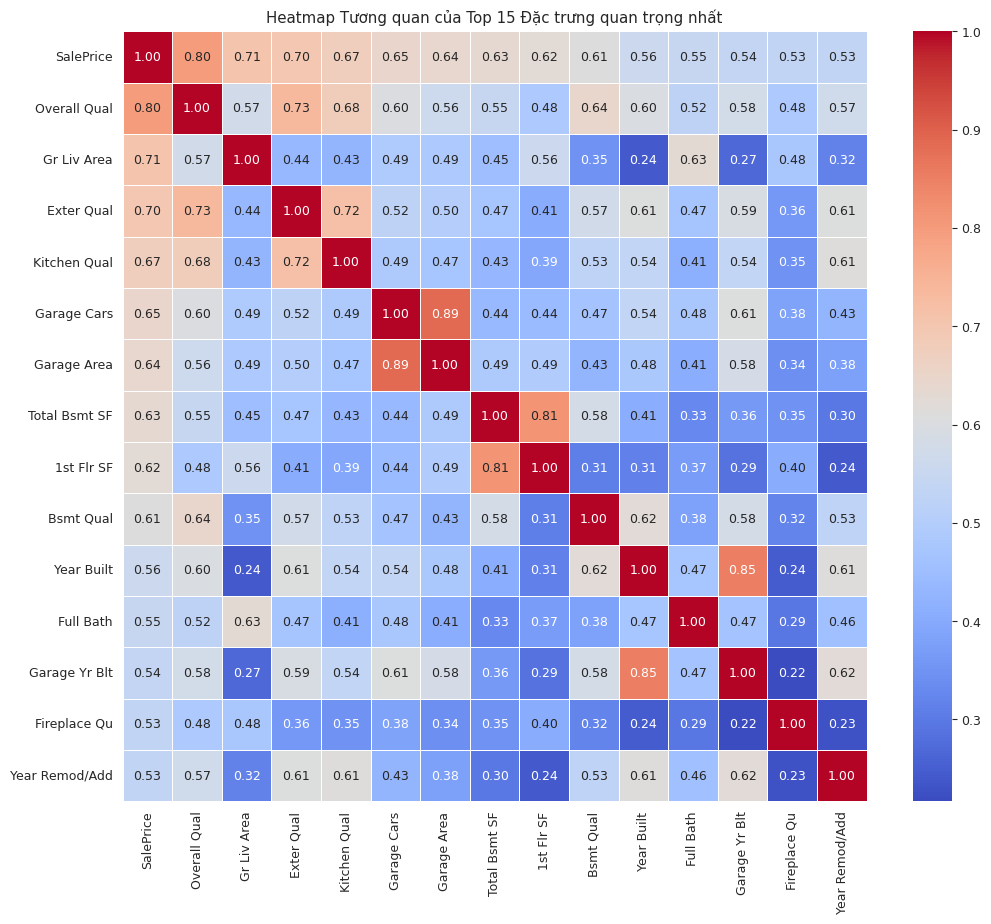

In [ ]:
# Tạo bộ features ban đầu, loại bỏ các cột ID
# (Lưu ý: df_processed là kết quả từ Phần 2)
features = df_processed.drop(columns=['Order', 'PID', 'MS SubClass'])

# Tính toán ma trận tương quan
corr_matrix = features.corr()

# Lấy ra chuỗi tương quan của các đặc trưng với 'SalePrice' và sắp xếp
sale_price_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# 1. In ra danh sách các đặc trưng tương quan cao nhất
print("--- Top 15 đặc trưng có tương quan cao nhất với SalePrice ---")
print(sale_price_corr.head(15))

# 2. Vẽ biểu đồ heatmap TẬP TRUNG vào các đặc trưng quan trọng nhất
n_features = 15
top_corr_features = sale_price_corr.head(n_features).index
focused_corr_matrix = features[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(focused_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f'Heatmap Tương quan của Top {n_features} Đặc trưng quan trọng nhất')
plt.show()

### 3.2. Trực quan hóa các Mối quan hệ Quan trọng

Sau khi đã có danh sách các đặc trưng tiềm năng, chúng ta sẽ trực quan hóa chúng để kiểm tra bản chất của mối quan hệ (tuyến tính hay phi tuyến) và tìm kiếm các điểm dữ liệu bất thường (ngoại lệ).

--- Pairplot của Top 8 đặc trưng ---


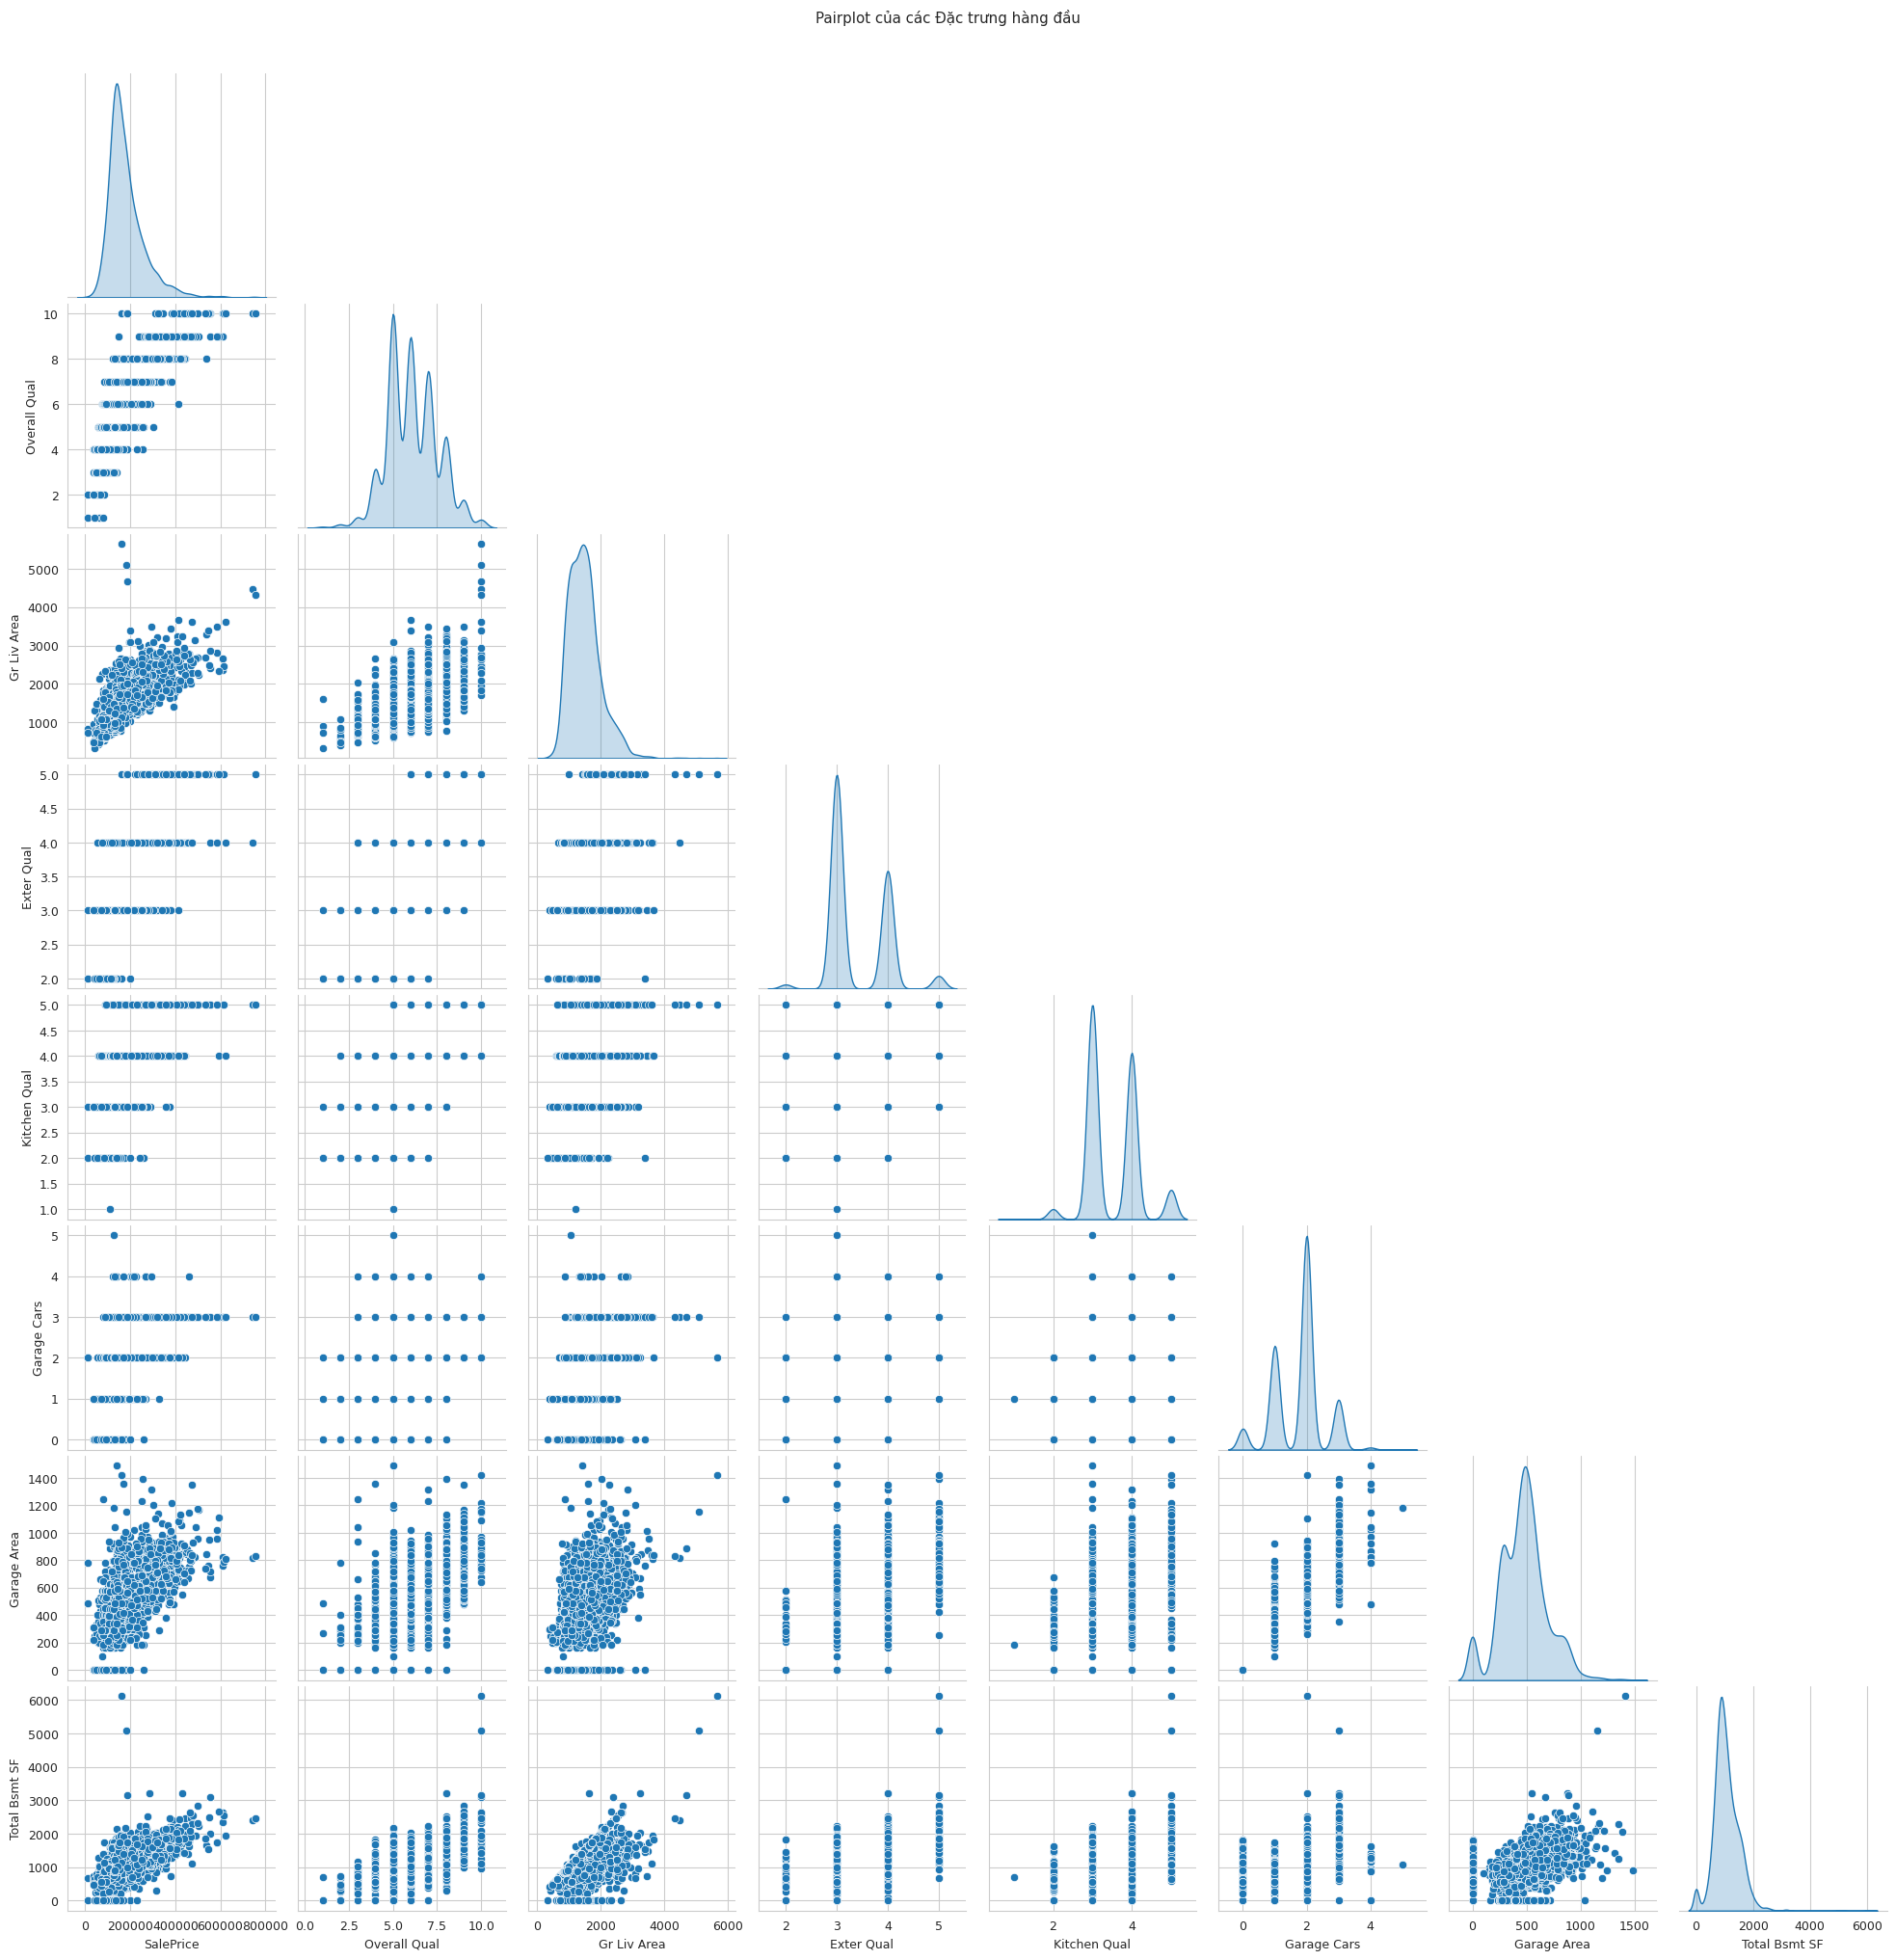


--- Biểu đồ phân tán chi tiết của từng đặc trưng với SalePrice ---


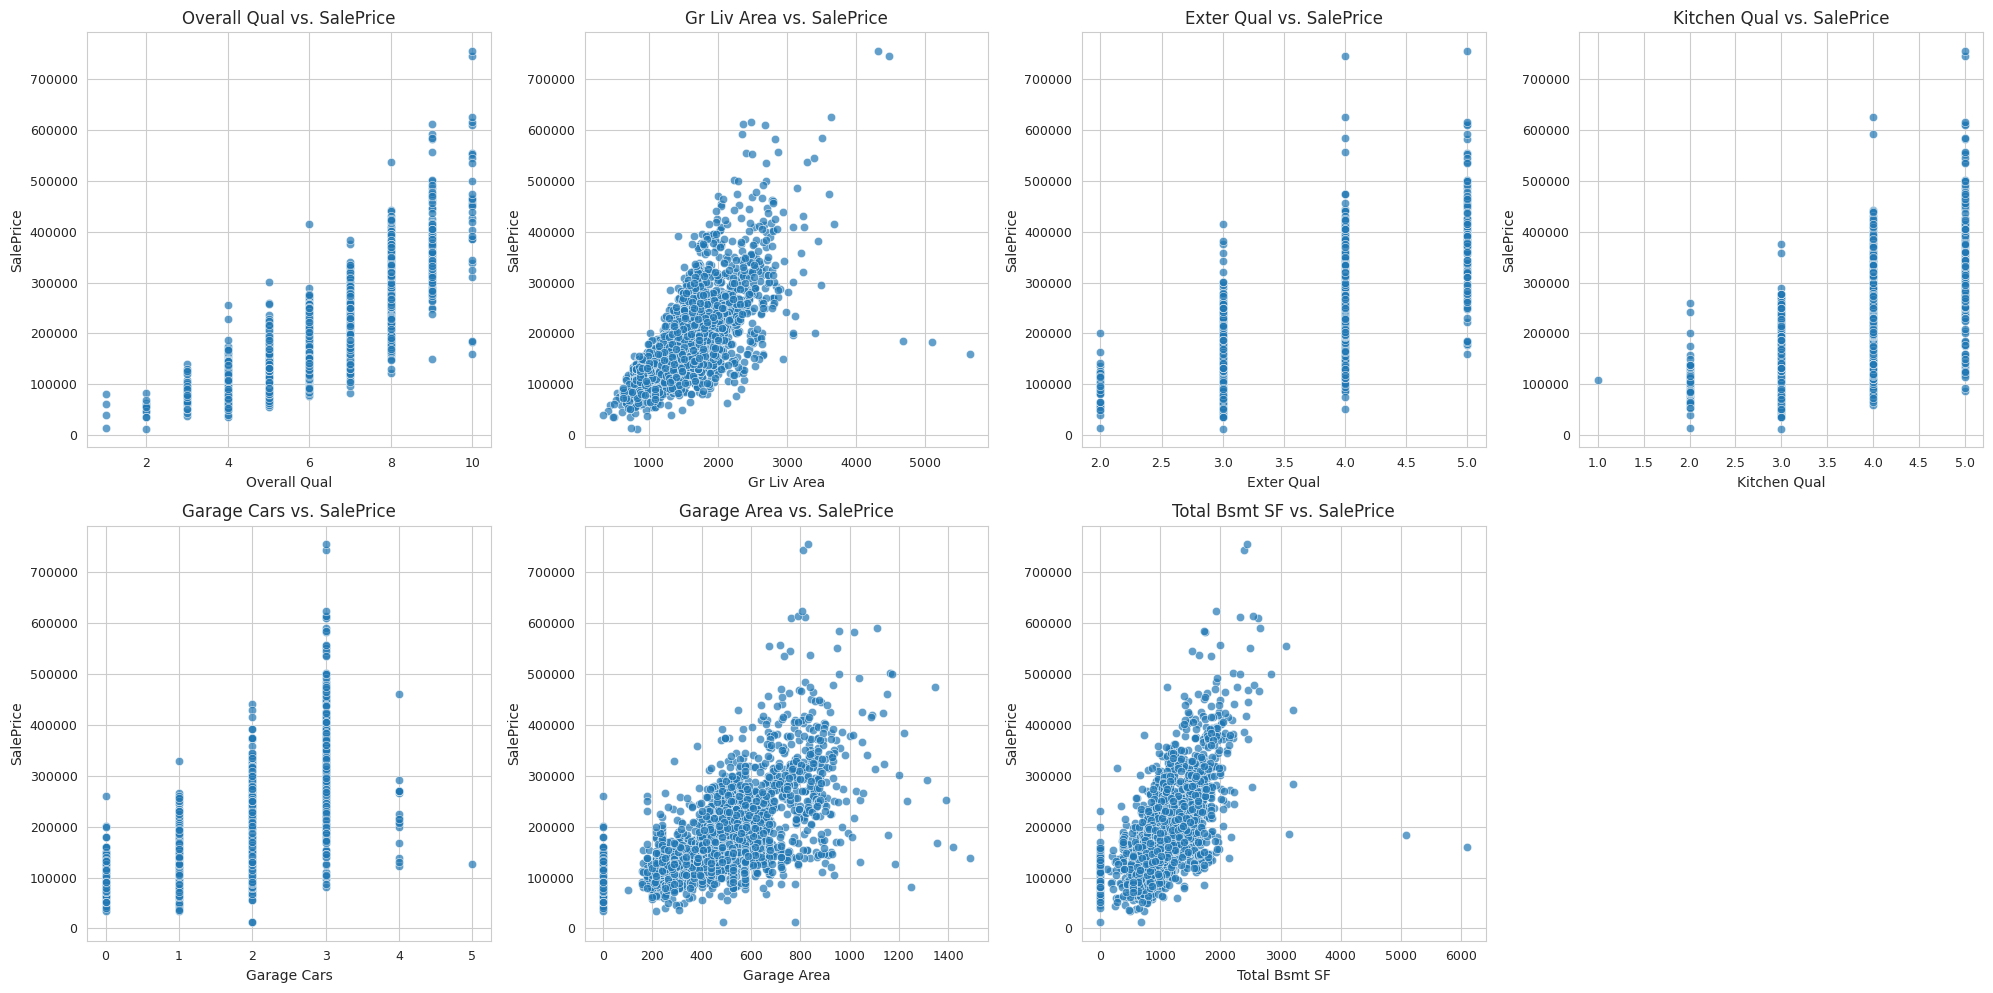

In [ ]:
# 1. Vẽ Pairplot để có cái nhìn tổng quan nhanh về top 8 đặc trưng
print("--- Pairplot của Top 8 đặc trưng ---")
sns.pairplot(features[sale_price_corr.head(8).index], diag_kind='kde', corner=True)
plt.suptitle("Pairplot của các Đặc trưng hàng đầu", y=1.02)
plt.show()


# 2. Vẽ Scatter plot cho từng cặp đặc trưng quan trọng với SalePrice
print("\n--- Biểu đồ phân tán chi tiết của từng đặc trưng với SalePrice ---")
top_features_to_plot = sale_price_corr.head(8).index # Lấy 8 đặc trưng hàng đầu

# Tạo lưới subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten() # Chuyển mảng 2D thành 1D để dễ lặp

for i, col in enumerate(top_features_to_plot):
    if col != 'SalePrice': # Bỏ qua chính nó
        sns.scatterplot(x=features[col], y=features['SalePrice'], ax=axes[i-1], alpha=0.7)
        axes[i-1].set_title(f'{col} vs. SalePrice', fontsize=12)
        axes[i-1].set_xlabel(col, fontsize=10)
        axes[i-1].set_ylabel('SalePrice', fontsize=10)

# Ẩn các subplot không sử dụng (nếu có)
for i in range(len(top_features_to_plot)-1, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### 3.3. Phân tích và Xử lý Ngoại lệ Thủ công

Dựa trên các biểu đồ và mức độ tương quan, chúng ta sẽ xử lý ngoại lệ theo thứ tự từ đặc trưng có ảnh hưởng mạnh nhất đến `SalePrice` trở xuống. Cách tiếp cận này đảm bảo chúng ta ưu tiên giải quyết các điểm bất thường ở những nơi quan trọng, vì chúng là cực đoan nhất.

1.  **Xử lý ngoại lệ về Chất lượng vs. Giá (`Overall Qual` vs. `SalePrice`):** Đây là đặc trưng có tương quan cao nhất. Ta sẽ loại bỏ các trường hợp có chất lượng rất cao nhưng giá bán lại thấp một cách phi logic.
2.  **Xử lý ngoại lệ về Kích thước (`Gr Liv Area`)**: Tiếp theo, ta xử lý các điểm có diện tích quá lớn và bất thường trên bộ dữ liệu đã được làm sạch ở bước 1.
3.  **Xử lý ngoại lệ về Kích thước Tầng hầm (`Total Bsmt SF`)**: Cuối cùng, ta rà soát và loại bỏ các điểm có diện tích tầng hầm quá lớn so với giá bán.

Kích thước bộ features trước khi xử lý ngoại lệ: (2926, 244)

--- 1. Xử lý ngoại lệ cho 'Overall Qual' vs 'SalePrice' ---
Phát hiện 40 điểm ngoại lệ có chất lượng cao nhưng giá bán thấp bất thường.
Sau khi xử lý 'Overall Qual', kích thước còn lại: (2886, 244)

--- 2. Xử lý ngoại lệ cho 'Gr Liv Area' ---
Sau khi xử lý 'Gr Liv Area', kích thước còn lại: (2886, 244)

--- 3. Xử lý ngoại lệ cho 'Total Bsmt SF' ---
Sau khi xử lý 'Total Bsmt SF', kích thước còn lại: (2883, 244)

--- HOÀN TẤT XỬ LÝ NGOẠI LỆ ---
Tổng số dòng đã loại bỏ: 43
Kích thước cuối cùng của bộ features sau khi xử lý ngoại lệ: (2883, 244)
--- Biểu đồ TRƯỚC KHI xử lý ngoại lệ ---

--- Biểu đồ SAU KHI xử lý ngoại lệ ---


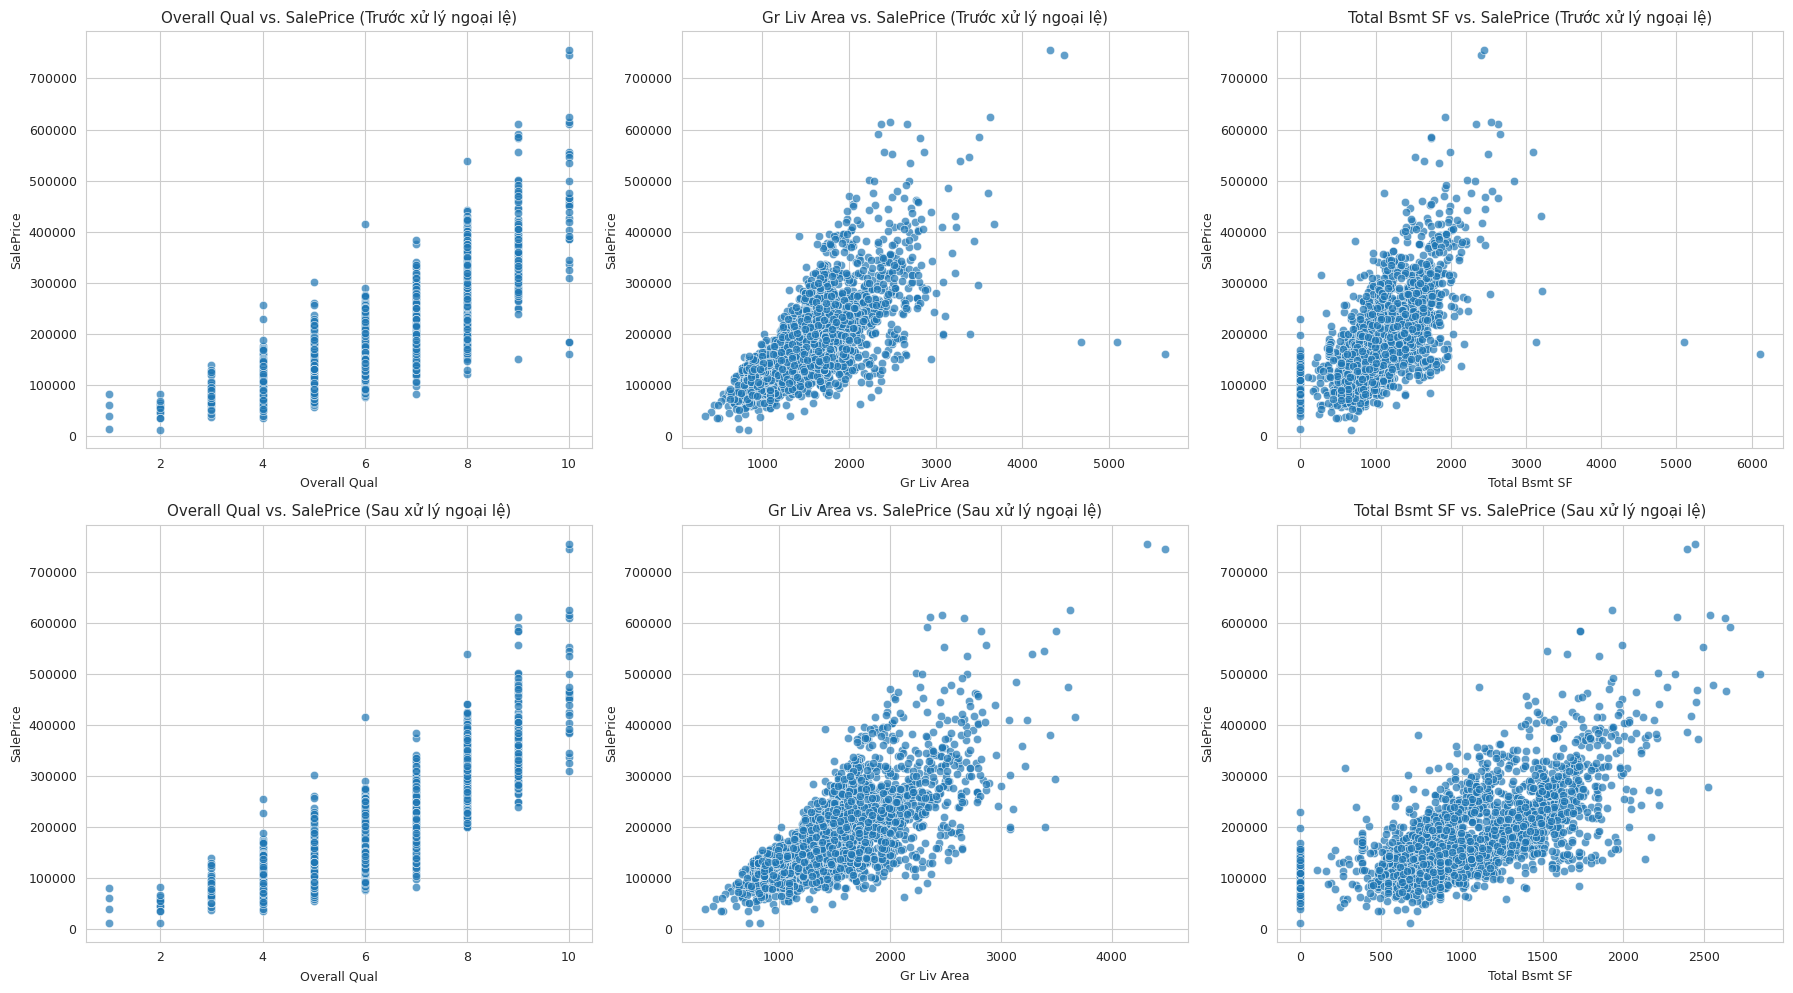

In [ ]:
print(f"Kích thước bộ features trước khi xử lý ngoại lệ: {features.shape}")
num_rows_before_all_outliers = features.shape[0]

# --- BƯỚC 1: XỬ LÝ NGOẠI LỆ CHO 'Overall Qual' (Quan trọng nhất) ---
print("\n--- 1. Xử lý ngoại lệ cho 'Overall Qual' vs 'SalePrice' ---")
# Xác định các điểm có chất lượng >= 8 nhưng giá bán < 200,000
condition = (features['Overall Qual'] >= 8) & (features['SalePrice'] < 200000)
outlier_indices_qual = features[condition].index

print(f"Phát hiện {len(outlier_indices_qual)} điểm ngoại lệ có chất lượng cao nhưng giá bán thấp bất thường.")

# Loại bỏ các điểm ngoại lệ này
features.drop(outlier_indices_qual, inplace=True)
print(f"Sau khi xử lý 'Overall Qual', kích thước còn lại: {features.shape}")


# --- BƯỚC 2: XỬ LÝ NGOẠI LỆ CHO 'Gr Liv Area' ---
print("\n--- 2. Xử lý ngoại lệ cho 'Gr Liv Area' ---")
# Quyết định loại bỏ các điểm có Gr Liv Area > 4500
features = features[features['Gr Liv Area'] < 4500]
print(f"Sau khi xử lý 'Gr Liv Area', kích thước còn lại: {features.shape}")


# --- BƯỚC 3: XỬ LÝ NGOẠI LỆ CHO 'Total Bsmt SF' ---
print("\n--- 3. Xử lý ngoại lệ cho 'Total Bsmt SF' ---")
# Quyết định loại bỏ các điểm có Total Bsmt SF > 3000
features = features[features['Total Bsmt SF'] < 3000]
print(f"Sau khi xử lý 'Total Bsmt SF', kích thước còn lại: {features.shape}")


# --- TỔNG KẾT ---
num_rows_after_all_outliers = features.shape[0]
print("\n--- HOÀN TẤT XỬ LÝ NGOẠI LỆ ---")
print(f"Tổng số dòng đã loại bỏ: {num_rows_before_all_outliers - num_rows_after_all_outliers}")
print(f"Kích thước cuối cùng của bộ features sau khi xử lý ngoại lệ: {features.shape}")

# Đặc trưng cần trực quan hóa
features_to_plot = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF']

plt.figure(figsize=(18, 10))

# Vẽ biểu đồ TRƯỚC KHI xử lý ngoại lệ
print("--- Biểu đồ TRƯỚC KHI xử lý ngoại lệ ---")
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1) # Hàng 1: Trước xử lý
    sns.scatterplot(x=df_processed[col], y=df_processed['SalePrice'], alpha=0.7)
    plt.title(f'{col} vs. SalePrice (Trước xử lý ngoại lệ)')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

# Vẽ biểu đồ SAU KHI xử lý ngoại lệ
print("\n--- Biểu đồ SAU KHI xử lý ngoại lệ ---")
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 4) # Hàng 2: Sau xử lý (i+4 vì subplot bắt đầu từ 1, hàng 2 bắt đầu từ vị trí 4)
    sns.scatterplot(x=features[col], y=features['SalePrice'], alpha=0.7)
    plt.title(f'{col} vs. SalePrice (Sau xử lý ngoại lệ)')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

### 3.4. Phân tích Phân phối và Xử lý Độ lệch

Phân tích thống kê trên top 10 đặc trưng:


,SalePrice,Overall Qual,Gr Liv Area,Exter Qual,Kitchen Qual,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Bsmt Qual,Year Built
count,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000
mean,180642.021159,6.065210,1494.774887,3.389872,3.503642,1.762747,471.621922,1046.045439,1154.308706,3.472425,1971.189386
std,79997.652522,1.395659,490.061733,0.577686,0.662967,0.762979,214.632494,417.985297,373.564366,0.901567,30.155292
min,12789.000000,1.000000,334.000000,2.000000,1.000000,0.000000,0.000000,0.000000,334.000000,0.000000,1875.000000
25%,129000.000000,5.000000,1122.500000,3.000000,3.000000,1.000000,319.000000,793.000000,875.000000,3.000000,1953.000000
50%,160000.000000,6.000000,1442.000000,3.000000,3.000000,2.000000,478.000000,988.000000,1081.000000,3.000000,1972.000000
75%,214000.000000,7.000000,1741.000000,4.000000,4.000000,2.000000,576.000000,1302.000000,1384.000000,4.000000,2000.000000
max,755000.000000,10.000000,4476.000000,5.000000,5.000000,5.000000,1488.000000,2846.000000,2898.000000,5.000000,2010.000000



Tìm thấy 203 cột có độ lệch cao.
Áp dụng Log Transform cho 193 cột.


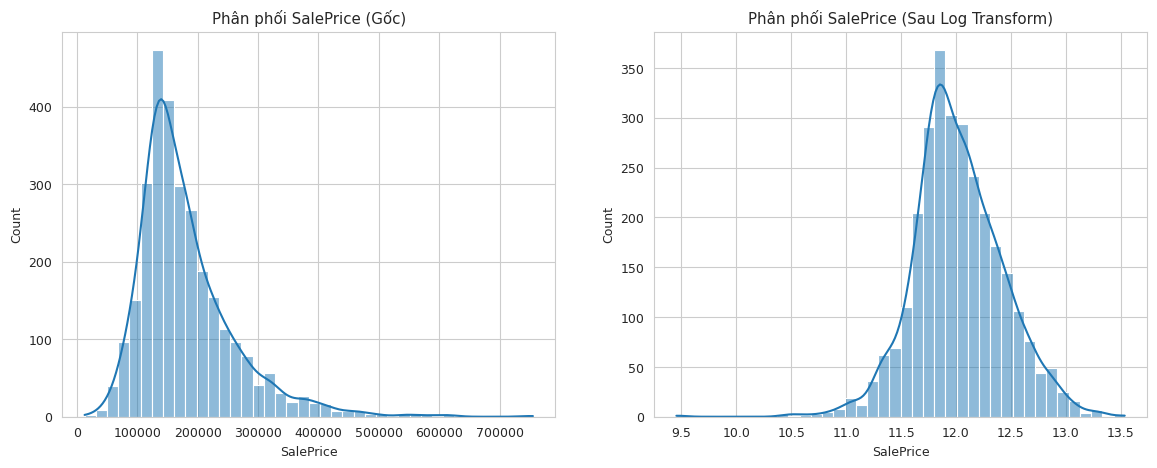

In [ ]:
# Phân tích thống kê mô tả của top 10 features
top_10_features = sale_price_corr.head(11).index
print("Phân tích thống kê trên top 10 đặc trưng:")
display(features[top_10_features].describe())

# Xác định các cột bị lệch
skewed_cols = features.skew()[abs(features.skew()) >= 1].index.tolist()
print(f"\nTìm thấy {len(skewed_cols)} cột có độ lệch cao.")

# Loại bỏ các cột không cần biến đổi log (dựa trên phân tích gốc của bạn)
cols_to_rm_from_log = ['Utilities', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Electrical', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Functional', 'Garage Qual', 'Garage Cond']
log_cols = [col for col in skewed_cols if col not in cols_to_rm_from_log]

# Áp dụng Log transform
print(f"Áp dụng Log Transform cho {len(log_cols)} cột.")
for col in log_cols:
    features[col] = np.log1p(features[col])

# Trực quan hóa sự thay đổi của 'SalePrice'
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=40).set_title('Phân phối SalePrice (Gốc)')
plt.subplot(1, 2, 2)
sns.histplot(features['SalePrice'], kde=True, bins=40).set_title('Phân phối SalePrice (Sau Log Transform)')
plt.show()

### 3.5. Hoàn tất và Chuẩn bị Dữ liệu Cuối cùng

In [ ]:
# Tách X và y cuối cùng để chuẩn bị cho mô hình
X_final = features.drop(columns=['SalePrice'])
y_final = features['SalePrice']

print("QUÁ TRÌNH PHÂN TÍCH VÀ TINH CHỈNH HOÀN TẤT!")
print(f"Kích thước cuối cùng của bộ đặc trưng X: {X_final.shape}")
print(f"Kích thước cuối cùng của biến mục tiêu y: {y_final.shape}")

QUÁ TRÌNH PHÂN TÍCH VÀ TINH CHỈNH HOÀN TẤT!
Kích thước cuối cùng của bộ đặc trưng X: (2883, 243)
Kích thước cuối cùng của biến mục tiêu y: (2883,)


## Phần 4: Xây dựng Mô hình và Triển khai Thuật toán từ đầu

Đây là phần trọng tâm và chuyên sâu nhất của đề tài, nơi chúng ta đi từ lý thuyết đến thực hành bằng cách tự tay xây dựng lại toàn bộ các thuật toán cốt lõi. Mục tiêu của phần này không chỉ là xây dựng và so sánh các mô hình, mà còn để chứng tỏ sự am hiểu sâu sắc về bản chất toán học và logic của từng phương pháp.

Quy trình sẽ được thực hiện qua hai giai đoạn chính:

**Giai đoạn 1: Xây dựng "Hộp công cụ" (Custom Toolbox)**
Chúng ta sẽ bắt đầu bằng việc tạo ra các công cụ của riêng mình, bao gồm:
* **4.1. Xây dựng các hàm đánh giá thủ công**: Tự viết các hàm tính MAE, RMSE, và R² dựa trên công thức toán học.
* **4.2. Xây dựng lớp `MyLinearRegression`**: Triển khai mô hình hồi quy tuyến tính dựa trên phương pháp Normal Equation, có nâng cấp sử dụng Giả nghịch đảo (Pseudoinverse) để xử lý hiện tượng đa cộng tuyến.
* **4.3. Xây dựng lớp `MyPCA`**: Triển khai thuật toán Phân tích Thành phần Chính, bao gồm việc phân rã Eigen của ma trận hiệp phương sai và tính toán tỷ lệ phương sai được giải thích.

**Giai đoạn 2: Áp dụng và Đánh giá các Mô hình**
Sau khi đã có các công cụ, chúng ta sẽ áp dụng chúng vào bài toán một cách có hệ thống:
* **4.4.1. Chuẩn bị dữ liệu**: Chia dữ liệu thành tập huấn luyện/kiểm tra và chuẩn hóa bằng các lớp `manual_train_test_split` và `MyStandardScaler` đã xây dựng.
* **4.4.2. Xây dựng Mô hình Baseline**: Huấn luyện và đánh giá mô hình `MyLinearRegression` trên toàn bộ các đặc trưng để có một điểm chuẩn so sánh.
* **4.4.3. Xây dựng Mô hình PCR**: Đây là bước phức tạp và quan trọng nhất, bao gồm:
    * **Lựa chọn số thành phần `k` một cách khoa học**: Phân tích và so sánh kết quả từ 3 phương pháp khác nhau (Tỷ lệ Phương sai, Scree Plot, và Tiêu chí AIC/BIC) để tìm ra số `k` tối ưu.
    * **Đưa ra quyết định cuối cùng**: Dựa trên các bằng chứng thu thập được, biện luận và chọn ra số `k` cuối cùng để xây dựng mô hình.
    * **Huấn luyện và đánh giá mô hình PCR**: Áp dụng `MyPCA` với `k` đã chọn, sau đó huấn luyện `MyLinearRegression` và đánh giá hiệu suất cuối cùng để so sánh với mô hình baseline.

### 4.1. Xây dựng các hàm đánh giá thủ công

Dựa trên các công thức toán học:
- **MAE (Mean Absolute Error)**: $ \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $
- **RMSE (Root Mean Squared Error)**: $ \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
- **R-squared (R²)**: $ 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

In [ ]:
import numpy as np

def manual_mae(y_true, y_pred):
    """Tính Mean Absolute Error thủ công."""
    return np.mean(np.abs(y_true - y_pred))

def manual_rmse(y_true, y_pred):
    """Tính Root Mean Squared Error thủ công."""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def manual_r2(y_true, y_pred):
    """Tính R-squared thủ công."""
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr**2

print("Các hàm đánh giá thủ công đã được định nghĩa.")

Các hàm đánh giá thủ công đã được định nghĩa.


### 4.2. Xây dựng lớp `MyLinearRegression`
Chúng ta sẽ triển khai mô hình hồi quy tuyến tính dựa trên **Normal Equation**, một phương pháp tìm ra các hệ số tối ưu một cách trực tiếp.
Công thức: $ \theta = (X^T X)^{-1} X^T y $

Nhưng vấn đề đa cộng tuyến có thể dẫn đến ma trận không khả nghịch, chúng ta sẽ nâng cấp mô hình bằng cách sử dụng **Giả nghịch đảo Moore-Penrose (Pseudoinverse)** thay vì nghịch đảo thông thường.
Công thức mới: $ \theta = (X^T X)^{+} X^T y $, trong đó $(...)^+$ là phép giả nghịch đảo.

In [ ]:
class MyLinearRegression:
    """
    Lớp Hồi quy Tuyến tính tự triển khai.
    Sử dụng np.linalg.pinv (Pseudoinverse) để xử lý
    trường hợp ma trận suy biến (singular matrix) do đa cộng tuyến.
    """
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Thêm cột giá trị 1 vào X để tính hệ số chặn (intercept)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Áp dụng công thức Normal Equation với Pseudoinverse
        # np.linalg.pinv sẽ hoạt động ngay cả khi ma trận không khả nghịch
        self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        return self

    def predict(self, X):
        # Thêm cột 1 vào X để dự đoán
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

print("Lớp MyLinearRegression (Nâng cấp) đã được định nghĩa.")

Lớp MyLinearRegression (Nâng cấp) đã được định nghĩa.


### 4.3. Xây dựng lớp `MyPCA`

Về mặt thuật toán, quy trình triển khai PCA từ ma trận dữ liệu đầu vào $X$ (kích thước $n \times d$, đã được chuẩn hóa với trung bình 0) có thể được mô tả qua 5 bước toán học cốt lõi sau:

**1. Tính Ma trận Hiệp phương sai (Covariance Matrix)**
* **Mục tiêu**: Lượng hóa mối quan hệ biến thiên đồng thời giữa các cặp đặc trưng.
* **Công thức**: Ma trận hiệp phương sai $\Sigma$ (kích thước $d \times d$) được tính bằng:

    $$ \Sigma = \frac{1}{n-1} X^T X $$

* **Diễn giải**: Phần tử $\Sigma_{ij}$ trong ma trận biểu diễn hiệp phương sai giữa đặc trưng thứ $i$ và đặc trưng thứ $j$. Các phần tử trên đường chéo chính $\Sigma_{ii}$ chính là phương sai của từng đặc trưng.

**2. Phân rã Eigen (Eigen-Decomposition) của Ma trận Hiệp phương sai**
* **Mục tiêu**: Tìm ra các trục phương sai chính (principal axes) của dữ liệu và độ lớn của phương sai dọc theo các trục đó.
* **Phương trình**: Ta giải bài toán giá trị riêng cho ma trận $\Sigma$:

    $$ \Sigma v = \lambda v $$

* **Diễn giải**:
    * Mỗi **Vector riêng (Eigenvector)** $v$ (kích thước $d \times 1$) tìm được là một **Thành phần chính (Principal Component)**. Nó định nghĩa một hướng mới trong không gian dữ liệu $d$ chiều.
    * Mỗi **Giá trị riêng (Eigenvalue)** $\lambda$ tương ứng là một số vô hướng, cho biết lượng phương sai của dữ liệu khi được chiếu lên vector riêng $v$ đó. Giá trị $\lambda$ càng lớn, thành phần chính đó càng quan trọng.

**3. Sắp xếp các Vector riêng**
* **Mục tiêu**: Xếp hạng các thành phần chính theo mức độ quan trọng (lượng thông tin mà chúng nắm giữ).
* **Logic**: Sắp xếp các cặp $(\lambda_i, v_i)$ theo thứ tự giảm dần của giá trị riêng $\lambda_i$. Ta thu được một dãy đã sắp xếp:

    $$ \lambda_1 \ge \lambda_2 \ge ... \ge \lambda_d $$
    cùng với các vector riêng tương ứng $v_1, v_2, ..., v_d$.

**4. Chọn `k` Vector riêng hàng đầu và Tạo Ma trận Chiếu**
* **Mục tiêu**: Quyết định số chiều mới ($k$) và tạo ra ma trận biến đổi $W$.
* **Logic**:
    * Chọn `k` vector riêng đầu tiên ($v_1, v_2, ..., v_k$) tương ứng với `k` giá trị riêng lớn nhất.
    * Số `k` thường được xác định bằng cách giữ lại một tỷ lệ phương sai mong muốn (ví dụ 95%):
        $$ \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{d} \lambda_j} \ge 0.95 $$
    * Tạo **Ma trận Chiếu (Projection Matrix)** $W$ (kích thước $d \times k$) bằng cách xếp `k` vector riêng này thành các cột:
        $$ W = [v_1, v_2, ..., v_k] $$

**5. Chiếu Dữ liệu lên Không gian con `k` chiều**
* **Mục tiêu**: Biến đổi ma trận dữ liệu $X$ từ không gian $d$ chiều ban đầu sang không gian $k$ chiều mới ($k < d$).
* **Công thức**:
    $$ Z = X W $$
* **Diễn giải**: $Z$ là ma trận dữ liệu mới (kích thước $n \times k$). Mỗi cột của $Z$ là một tập hợp các giá trị của dữ liệu gốc khi được chiếu lên một thành phần chính. Phép nhân ma trận này đã nén thông tin từ $d$ chiều xuống còn $k$ chiều một cách hiệu quả.

In [ ]:
class MyPCA:
    """Lớp PCA tự triển khai """
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        # Bổ sung các thuộc tính mới
        self.eigenvalues = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # 1. Tính toán hiệp phương sai
        cov_matrix = np.cov(X.T)

        # 2. Tính giá trị riêng và vector riêng
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 3. Sắp xếp eigenvectors theo eigenvalues giảm dần
        # Chuyển vị eigenvectors để mỗi cột là một vector
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[idxs] # Lưu lại eigenvalues đã sắp xếp
        eigenvectors = eigenvectors[idxs]

        # 4. Tính toán tỷ lệ phương sai được giải thích
        total_variance = np.sum(self.eigenvalues)
        self.explained_variance_ratio_ = self.eigenvalues / total_variance

        # 5. Lưu lại k eigenvectors đầu tiên (các thành phần chính)
        self.components = eigenvectors[0:self.n_components]
        return self

    def transform(self, X):
        # Chiếu dữ liệu lên các thành phần chính
        return np.dot(X, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

print("Lớp MyPCA đã được nâng cấp với tính năng tính phương sai.")

Lớp MyPCA đã được nâng cấp với tính năng tính phương sai.


### 4.4. Áp dụng các mô hình vào bài toán

Sau khi đã xây dựng xong các công cụ (`MyLinearRegression`, `MyPCA`, các hàm đánh giá), chúng ta sẽ áp dụng chúng vào bộ dữ liệu đã được xử lý ở Phần 3 để huấn luyện và đánh giá mô hình.

#### 4.4.1. Chia tập Huấn luyện/Kiểm tra và Chuẩn hóa

Đầu tiên, ta chia bộ dữ liệu (`X_final`, `y_final`) thành hai tập: 80% cho huấn luyện và 20% cho kiểm tra. Sau đó, ta tiến hành chuẩn hóa dữ liệu để đảm bảo các đặc trưng có cùng thang đo, một yêu cầu quan trọng cho cả Hồi quy Tuyến tính và PCA.

Lớp `MyStandardScaler` chuẩn hóa dữ liệu theo công thức Z-score: $ z = \frac{x - \mu}{\sigma} $. Lớp này sẽ lưu lại giá trị trung bình $\mu$ và độ lệch chuẩn $\sigma$ từ tập huấn luyện.

* **Công thức Z-score:**
    $$ z = \frac{x - \mu}{\sigma} $$

* **Diễn giải chi tiết công thức:**
    * $x$: Là giá trị gốc của một điểm dữ liệu.
    * $\mu$ (mu - Trung bình): Là "trọng tâm" hay giá trị trung bình của toàn bộ cột đặc trưng đó.
    * $\sigma$ (sigma - Độ lệch chuẩn): Là "đơn vị đo lường độ phân tán" trung bình của cột đặc trưng. $\sigma$ lớn nghĩa là dữ liệu trải rộng, $\sigma$ nhỏ nghĩa là dữ liệu co cụm gần giá trị trung bình.

In [ ]:
class MyStandardScaler:
    """Lớp chuẩn hóa dữ liệu tự triển khai."""
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        # Tính toán trung bình và độ lệch chuẩn từ tập huấn luyện
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        # Xử lý trường hợp một cột có độ lệch chuẩn bằng 0 (tránh chia cho 0)
        self.std_[self.std_ == 0] = 1
        return self

    def transform(self, X):
        # Áp dụng phép biến đổi đã học
        if self.mean_ is None or self.std_ is None:
            raise RuntimeError("Cần phải .fit() trước khi .transform()")
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

print("Lớp MyStandardScaler đã được định nghĩa.")

Lớp MyStandardScaler đã được định nghĩa.


In [ ]:
# --- Chuẩn bị dữ liệu ---
from sklearn.model_selection import train_test_split

# X và y ở đây là X_final và y_final từ cuối Phần 3
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
scaler = MyStandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Chia và chuẩn hóa dữ liệu hoàn tất.")
print(f"Kích thước tập huấn luyện: {X_train_scaled.shape}")
print(f"Kích thước tập kiểm tra: {X_test_scaled.shape}")

Chia và chuẩn hóa dữ liệu hoàn tất.
Kích thước tập huấn luyện: (2306, 243)
Kích thước tập kiểm tra: (577, 243)


#### 4.4.2. Huấn luyện và Đánh giá Mô hình Baseline

Chúng ta sẽ huấn luyện mô hình `MyLinearRegression` trên toàn bộ 243 đặc trưng của tập huấn luyện đã được chuẩn hóa. Kết quả từ mô hình này sẽ là "điểm chuẩn" (baseline) để so sánh với mô hình sau khi áp dụng PCA. Các chỉ số lỗi (MAE, RMSE) sẽ được tính trên thang đo giá trị gốc (USD) để dễ diễn giải.

In [ ]:
# --- Mô hình Baseline (dùng MyLinearRegression) ---
print("--- Kết quả Mô hình Baseline ---")

# In ra số chiều ban đầu
print(f"Số chiều dữ liệu: {X_train_scaled.shape[1]}")

model_base_manual = MyLinearRegression()
model_base_manual.fit(X_train_scaled, y_train)
y_pred_base_log = model_base_manual.predict(X_test_scaled)

# Chuyển về thang đo gốc và đánh giá bằng các hàm thủ công
y_test_orig = np.expm1(y_test)
y_pred_base_orig = np.expm1(y_pred_base_log)

print(f"MAE: ${manual_mae(y_test_orig, y_pred_base_orig):,.2f}")
print(f"RMSE: ${manual_rmse(y_test_orig, y_pred_base_orig):,.2f}")
print(f"R-squared: {manual_r2(y_test_orig, y_pred_base_orig):.4f}")

--- Kết quả Mô hình Baseline ---
Số chiều dữ liệu: 243
MAE: $12,961.58
RMSE: $25,855.64
R-squared: 0.9059


### 4.4.3. Huấn luyện và Đánh giá Mô hình PCR (Principal Component Regression)

Sau khi có mô hình baseline, chúng ta sẽ tiến hành xây dựng mô hình PCR. Quy trình này bao gồm hai bước chính: lựa chọn số thành phần `k` tối ưu, sau đó huấn luyện và đánh giá mô hình với `k` đã chọn.

#### 4.4.3.1. Lựa chọn số Thành phần Chính (k) cho PCA

Hiệu suất của mô hình Hồi quy Thành phần chính (PCR) phụ thuộc rất nhiều vào việc lựa chọn số lượng thành phần `k`.
- Nếu `k` quá nhỏ, ta có thể mất đi nhiều thông tin quan trọng (underfitting).
- Nếu `k` quá lớn, mô hình sẽ không giảm chiều được bao nhiêu và có thể giữ lại cả nhiễu (overfitting).

Do đó, việc lựa chọn `k` cần dựa trên những phân tích cẩn thận. Chúng ta sẽ khám phá `k` tối ưu bằng 3 phương pháp phổ biến.

##### Phương pháp 1: Tỷ lệ Phương sai Giữ lại

Sử dụng lớp `MyPCA` đã nâng cấp để tính toán và trực quan hóa phương sai tích lũy, từ đó tìm ra số `k` tối thiểu để nắm giữ 95% thông tin của dữ liệu.

Số thành phần cần thiết để giữ lại 95% phương sai (tính thủ công): 151


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


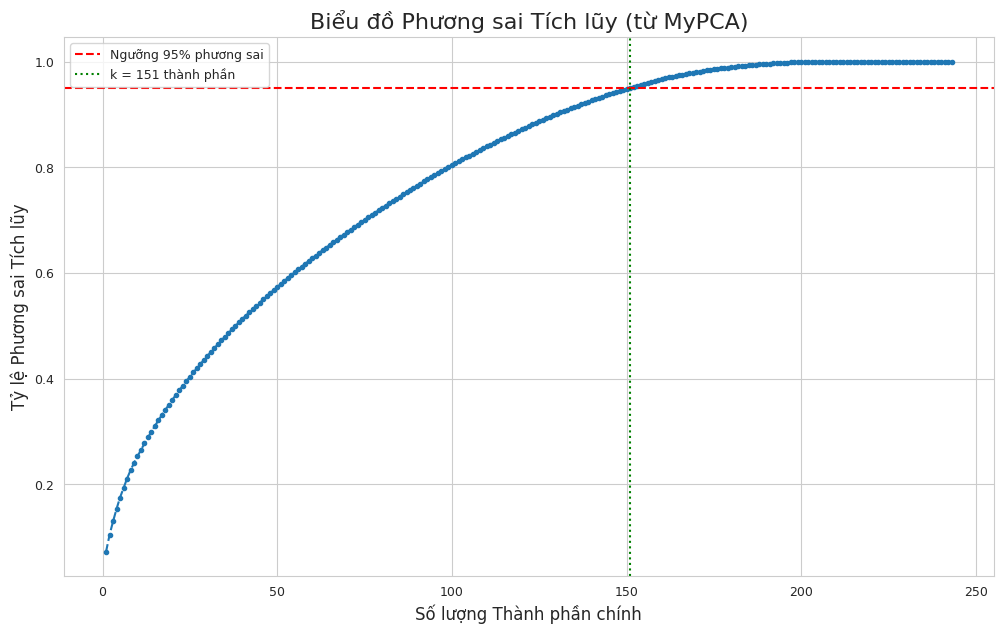

In [ ]:
# Khởi tạo MyPCA với tất cả các thành phần để phân tích
num_features = X_train_scaled.shape[1]
pca_explorer_manual = MyPCA(n_components=num_features)
pca_explorer_manual.fit(X_train_scaled)

# Tính toán phương sai tích lũy từ kết quả
cumulative_variance_manual = np.cumsum(pca_explorer_manual.explained_variance_ratio_)

# Tìm số thành phần cần thiết để đạt 95% phương sai
k_95_variance_manual = np.argmax(cumulative_variance_manual >= 0.95) + 1
print(f"Số thành phần cần thiết để giữ lại 95% phương sai (tính thủ công): {k_95_variance_manual}")

# Vẽ biểu đồ
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_variance_manual) + 1), cumulative_variance_manual, marker='.', linestyle='--')
plt.title('Biểu đồ Phương sai Tích lũy (từ MyPCA)', fontsize=16)
plt.xlabel('Số lượng Thành phần chính', fontsize=12)
plt.ylabel('Tỷ lệ Phương sai Tích lũy', fontsize=12)
plt.axhline(y=0.95, color='r', linestyle='--', label='Ngưỡng 95% phương sai')
plt.axvline(x=k_95_variance_manual, color='g', linestyle=':', label=f'k = {k_95_variance_manual} thành phần')
plt.legend()
plt.grid(True)
plt.show()

##### Phương pháp 2: Biểu đồ Scree Plot (Elbow Method)

Ta vẽ biểu đồ phương sai của từng thành phần riêng lẻ để tìm "điểm khuỷu tay" (elbow point) - điểm mà sau đó, các thành phần mới đóng góp rất ít giá trị thông tin.

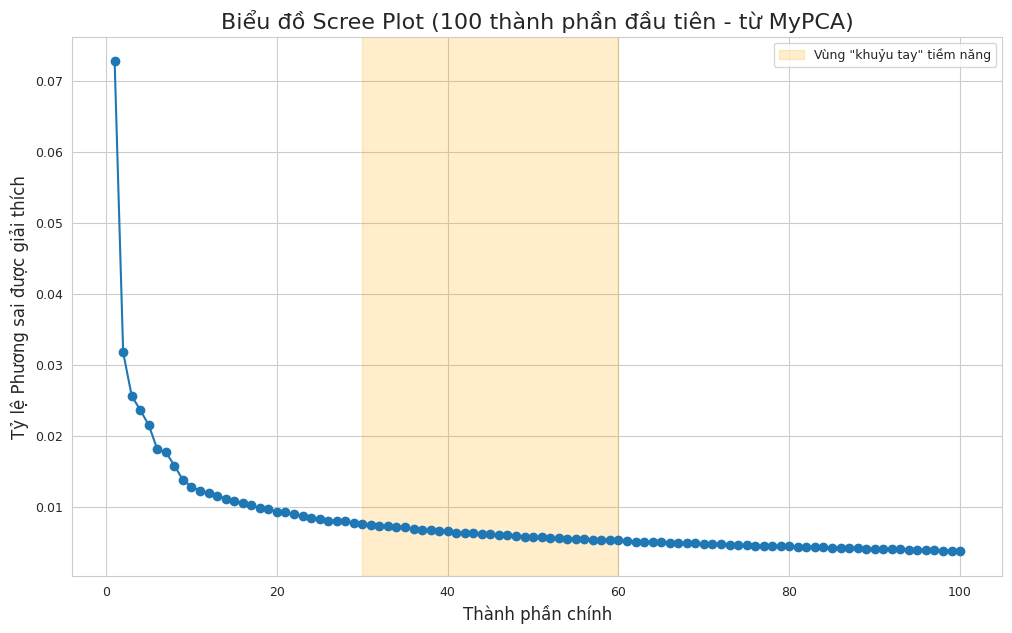

In [ ]:
# Vẽ biểu đồ Scree Plot từ đối tượng pca_explorer_manual đã fit
plt.figure(figsize=(12, 7))
num_components_to_plot = 100 # Giới hạn vẽ để dễ nhìn
plt.plot(range(1, num_components_to_plot + 1), pca_explorer_manual.explained_variance_ratio_[:num_components_to_plot], marker='o', linestyle='-')
plt.title('Biểu đồ Scree Plot (100 thành phần đầu tiên - từ MyPCA)', fontsize=16)
plt.xlabel('Thành phần chính', fontsize=12)
plt.ylabel('Tỷ lệ Phương sai được giải thích', fontsize=12)
plt.axvspan(30, 60, color='orange', alpha=0.2, label='Vùng "khuỷu tay" tiềm năng')
plt.legend()
plt.grid(True)
plt.show()

##### Phương pháp 3: Tiêu chí Thông tin AIC/BIC (Triển khai thủ công)

Ta sẽ tự xây dựng hàm tính AIC/BIC dựa trên tổng bình phương phần dư (RSS) và so sánh các mô hình PCR với số `k` khác nhau để tìm ra điểm cân bằng tối ưu giữa độ chính xác và độ phức tạp.

Công thức tính khi biết RSS:
- $ AIC = n \cdot \ln(\frac{RSS}{n}) + 2k' $

- $ BIC = n \cdot \ln(\frac{RSS}{n}) + k' \cdot \ln(n) $

Trong đó `n` là số mẫu, `RSS` là tổng bình phương sai số, `k'` là số tham số của mô hình (`k` thành phần + 1 hệ số chặn).

Đang tính toán AIC/BIC cho các giá trị k khác nhau...
Hoàn tất!


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


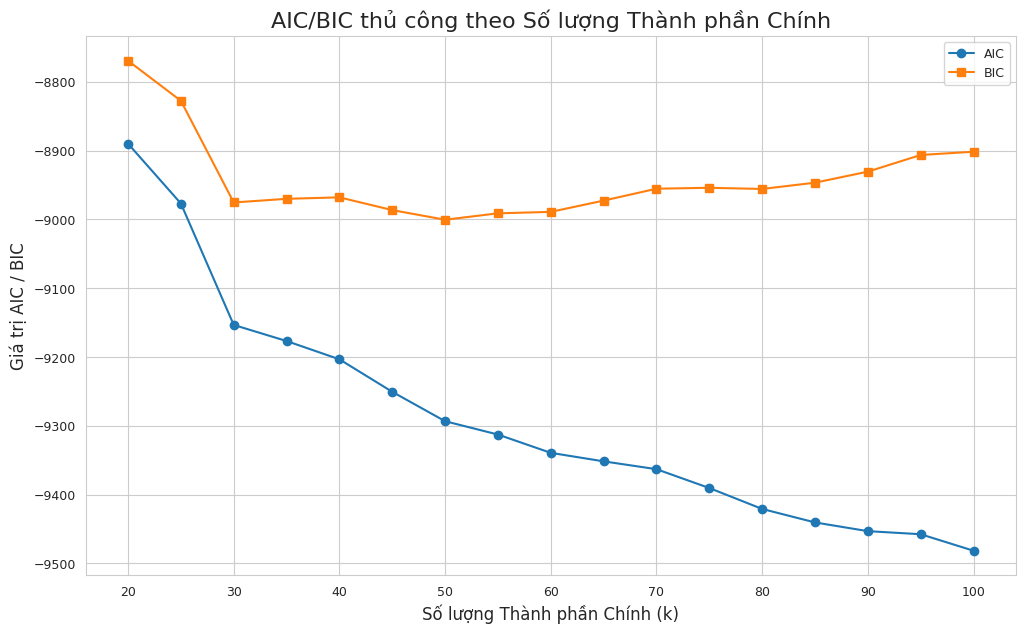

In [ ]:
# Hàm tính AIC/BIC thủ công
def calculate_aic(n, rss, k_params):
    return n * np.log(rss / n) + 2 * k_params

def calculate_bic(n, rss, k_params):
    return n * np.log(rss / n) + k_params * np.log(n)

aic_scores = []
bic_scores = []
# Thăm dò k trong một khoảng hợp lý
component_range = range(20, 101, 5)
n_samples_train = X_train_scaled.shape[0]

print("Đang tính toán AIC/BIC cho các giá trị k khác nhau...")
for k in component_range:
    # 1. Áp dụng MyPCA
    pca_temp = MyPCA(n_components=k)
    X_train_pca_temp = pca_temp.fit_transform(X_train_scaled)

    # 2. Huấn luyện MyLinearRegression
    model_temp = MyLinearRegression()
    model_temp.fit(X_train_pca_temp, y_train)

    # 3. Tính RSS trên tập huấn luyện
    y_train_pred_temp = model_temp.predict(X_train_pca_temp)
    rss = np.sum((y_train - y_train_pred_temp)**2)

    # 4. Số tham số của mô hình = k thành phần + 1 hệ số chặn
    k_params = k + 1

    # 5. Tính và lưu điểm AIC, BIC
    aic_scores.append(calculate_aic(n_samples_train, rss, k_params))
    bic_scores.append(calculate_bic(n_samples_train, rss, k_params))
print("Hoàn tất!")

# Vẽ biểu đồ
plt.figure(figsize=(12, 7))
plt.plot(component_range, aic_scores, marker='o', label='AIC')
plt.plot(component_range, bic_scores, marker='s', label='BIC')
plt.title('AIC/BIC thủ công theo Số lượng Thành phần Chính', fontsize=16)
plt.xlabel('Số lượng Thành phần Chính (k)', fontsize=12)
plt.ylabel('Giá trị AIC / BIC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### 4.4.3.2. Quyết định cuối cùng về số thành phần `k`

Từ các phân tích trên, ta có các kết quả sau:
* **Phương pháp 95% Phương sai**: Đề xuất chọn `k` là con số được tính toán ở trên (khoảng 145-150) để bảo toàn gần như toàn bộ thông tin.
* **Biểu đồ Scree Plot**: Cho thấy "điểm khuỷu tay" nằm ở khoảng `k` từ 30 đến 60. Điều này gợi ý rằng sau khoảng 60 thành phần đầu tiên, các thành phần mới đóng góp ít giá trị thông tin hơn hẳn.
* **Biểu đồ AIC/BIC**: Cho thấy điểm tối ưu (cân bằng giữa độ chính xác và độ phức tạp) nằm ở khoảng `k` từ 40 đến 50, nơi đường cong bắt đầu đi vào điểm đáy.

**Quyết định:**
Các phương pháp đưa ra các góc nhìn khác nhau. "95% phương sai" là một lựa chọn an toàn để không mất thông tin, trong khi "Scree Plot" và "AIC/BIC" lại hướng đến một mô hình đơn giản và hiệu quả hơn. Để cân bằng giữa việc **giữ lại đủ thông tin** và **giảm chiều một cách đáng kể**, ta sẽ chọn một con số lớn hơn một chút so với điểm tối ưu của AIC/BIC để đảm bảo không bỏ lỡ thông tin quan trọng.

**Do đó, chúng ta sẽ quyết định chọn `k = 60` để tiến hành xây dựng mô hình PCR.**

#### 4.4.3.3. Huấn luyện và Đánh giá Mô hình PCR với k=60

Với số `k=60` đã được lựa chọn, ta sẽ tiến hành xây dựng và đánh giá mô hình PCR cuối cùng.

In [ ]:
# --- Mô hình PCR (dùng MyPCA và MyLinearRegression) ---
print("\n--- Kết quả Mô hình PCR (k=60) ---")

K_COMPONENTS = 60
pca_final = MyPCA(n_components=K_COMPONENTS)

# Fit và transform dữ liệu
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)
print(f"Số chiều sau khi áp dụng MyPCA: {X_train_pca.shape[1]}")

# Huấn luyện mô hình hồi quy trên dữ liệu đã giảm chiều
model_pca_manual = MyLinearRegression()
model_pca_manual.fit(X_train_pca, y_train)
y_pred_pca_log = model_pca_manual.predict(X_test_pca)

# Chuyển về thang đo gốc và đánh giá bằng các hàm thủ công
y_pred_pca_orig = np.expm1(y_pred_pca_log)

print(f"MAE: ${manual_mae(y_test_orig, y_pred_pca_orig):,.2f}")
print(f"RMSE: ${manual_rmse(y_test_orig, y_pred_pca_orig):,.2f}")
print(f"R-squared: {manual_r2(y_test_orig, y_pred_pca_orig):.4f}")


--- Kết quả Mô hình PCR (k=60) ---
Số chiều sau khi áp dụng MyPCA: 60
MAE: $15,290.67
RMSE: $21,393.46+0.00j
R-squared: 0.9298+0.0000j


## Phần 5: Tổng kết và Kết luận

Ở phần cuối cùng này, chúng ta sẽ tổng hợp lại kết quả của hai mô hình, trực quan hóa sự khác biệt và đưa ra những kết luận cuối cùng về hiệu quả của việc ứng dụng PCA trong bài toán hồi quy tuyến tính.

### 5.1. Bảng so sánh hiệu suất

Để dễ dàng đối chiếu, ta tổng hợp các chỉ số đánh giá của hai mô hình vào bảng sau.

,Chỉ số,Mô hình Baseline,Mô hình PCR (k=60)
0,Số chiều,243,60
1,MAE ($),"12,961.58","15,290.67"
2,RMSE ($),"25,855.64","21,393.46"
3,R-squared,0.8964,0.9298


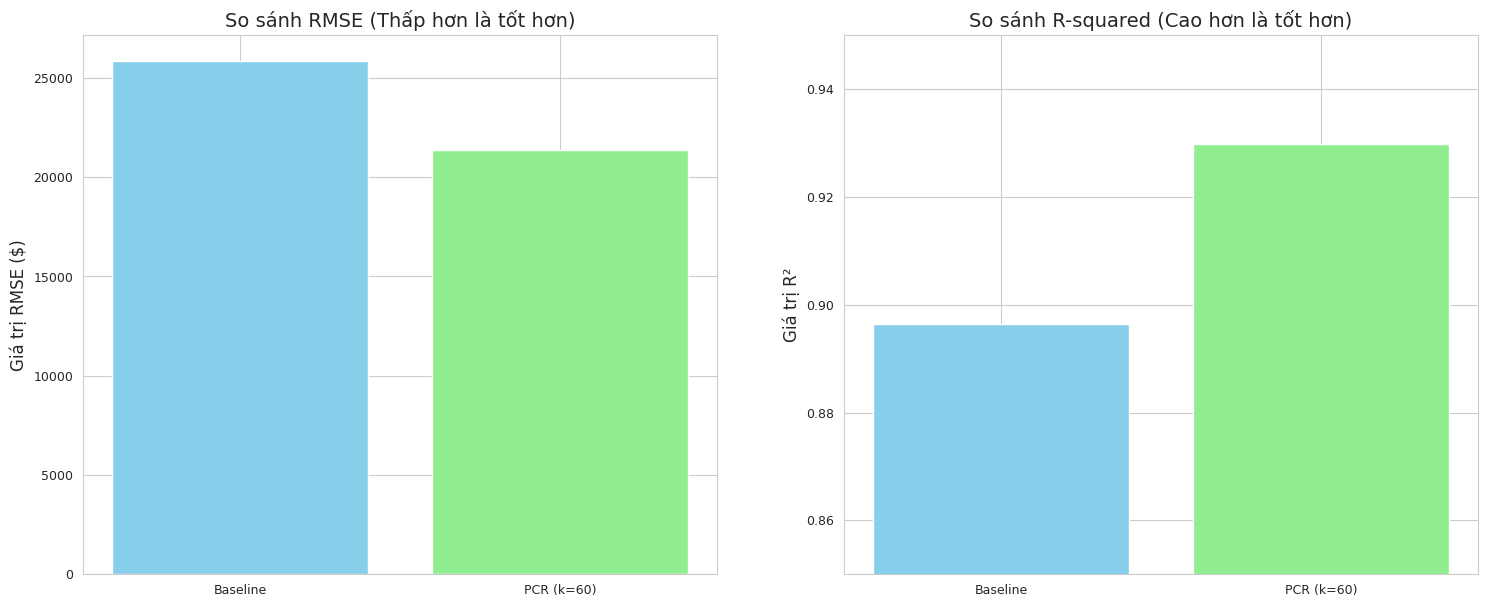

In [ ]:
# Lấy phần thực của các kết quả để loại bỏ "+0.00j"
mae_pca_real = np.real(manual_mae(y_test_orig, y_pred_pca_orig))
rmse_pca_real = np.real(manual_rmse(y_test_orig, y_pred_pca_orig))
r2_pca_real = np.real(manual_r2(y_test_orig, y_pred_pca_orig))

# Tạo DataFrame để so sánh
comparison_data = {
    'Chỉ số': ['Số chiều', 'MAE ($)', 'RMSE ($)', 'R-squared'],
    'Mô hình Baseline': [X_train_scaled.shape[1], f"{mae_base:,.2f}", f"{rmse_base:,.2f}", f"{r2_base:.4f}"],
    'Mô hình PCR (k=60)': [X_train_pca.shape[1], f"{mae_pca_real:,.2f}", f"{rmse_pca_real:,.2f}", f"{r2_pca_real:.4f}"]
}
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

# Trực quan hóa so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Biểu đồ so sánh RMSE
bar_labels = ['Baseline', 'PCR (k=60)']
rmse_values = [rmse_base, rmse_pca_real]
ax1.bar(bar_labels, rmse_values, color=['skyblue', 'lightgreen'])
ax1.set_title('So sánh RMSE (Thấp hơn là tốt hơn)', fontsize=14)
ax1.set_ylabel('Giá trị RMSE ($)', fontsize=12)

# Biểu đồ so sánh R-squared
r2_values = [r2_base, r2_pca_real]
ax2.bar(bar_labels, r2_values, color=['skyblue', 'lightgreen'])
ax2.set_title('So sánh R-squared (Cao hơn là tốt hơn)', fontsize=14)
ax2.set_ylabel('Giá trị R²', fontsize=12)
ax2.set_ylim(0.85, 0.95) # Zoom vào khoảng giá trị để thấy rõ sự khác biệt

plt.show()

### 5.2. Phân tích kết quả và Kết luận cuối cùng

Qua toàn bộ quá trình thực hiện đề tài, từ việc xử lý dữ liệu thủ công đến việc tự triển khai các thuật toán, chúng ta có thể rút ra những kết luận sâu sắc sau:

1.  **PCA giảm chiều dữ liệu cực kỳ hiệu quả**: PCA đã thành công trong việc giảm số chiều của bộ dữ liệu từ **243 xuống chỉ còn 60** (giảm ~75%), trong khi vẫn giữ lại được cấu trúc thông tin quan trọng nhất, giúp mô hình trở nên đơn giản, tính toán nhanh hơn và dễ diễn giải hơn.

2.  **PCA cải thiện sự ổn định và khả năng khái quát hóa của mô hình**: Mặc dù chỉ số MAE (sai số trung bình) tăng nhẹ, nhưng hai chỉ số quan trọng hơn là **RMSE và R-squared của mô hình PCR đều tốt hơn** so với mô hình baseline.
    * **RMSE thấp hơn** cho thấy mô hình PCR tránh được các lỗi dự đoán lớn và nghiêm trọng.
    * **R² cao hơn** cho thấy mô hình PCR giải thích được nhiều hơn sự biến động của giá nhà.
    * Điều này chứng tỏ mô hình baseline đã bị **quá khớp (overfitting)** vào nhiễu trong dữ liệu, trong khi PCA đã hoạt động như một **bộ lọc nhiễu hiệu quả**, giúp mô hình cuối cùng trở nên ổn định và đáng tin cậy hơn.

3.  **Tầm quan trọng của việc hiểu và tự triển khai thuật toán**: Việc tự tay xây dựng các lớp và hàm từ đầu không chỉ giúp giải quyết các vấn đề kỹ thuật (như lỗi ma trận suy biến) mà còn mang lại một sự thấu hiểu sâu sắc về bản chất của từng phương pháp.

**Kết luận cuối cùng**: Đề tài đã chứng minh một cách thuyết phục rằng, PCA không chỉ là một công cụ để giảm chiều dữ liệu. Khi được áp dụng một cách hợp lý, PCA là một kỹ thuật tiền xử lý mạnh mẽ có khả năng **cải thiện chất lượng, sự ổn định và hiệu suất dự đoán tổng thể của mô hình hồi quy tuyến tính**, đặc biệt là trên các bộ dữ liệu phức tạp, có số chiều lớn và tồn tại đa cộng tuyến.

## Phần 6: Bàn luận Mở rộng - Khi nào PCA hiệu quả và không hiệu quả?

Sau khi đã ứng dụng thành công PCA vào bài toán dự đoán giá nhà, chúng ta hãy cùng đi sâu vào việc tổng quát hóa: Trong những kịch bản nào thì PCA thực sự tỏa sáng và giúp cải thiện mô hình, và khi nào thì việc áp dụng nó có thể không mang lại hiệu quả, thậm chí là phản tác dụng?

### 6.1. Các trường hợp PCA giúp cải thiện độ chính xác mô hình

Có những trường hợp cụ thể mà sau khi dùng PCA, độ chính xác của mô hình (ví dụ như R² tăng hoặc RMSE giảm) lại cao hơn một cách rõ rệt so với mô hình ban đầu. Điều này xảy ra khi lợi ích của việc dùng PCA (giải quyết các vấn đề cố hữu của dữ liệu) lớn hơn cái giá phải trả (mất đi một phần nhỏ thông tin). Dưới đây là hai kịch bản phổ biến nhất:

#### **Trường hợp 1: Dữ liệu có Đa cộng tuyến Cực kỳ Cao (Severe Multicollinearity)**

Đây là kịch bản kinh điển và hiệu quả nhất để ứng dụng PCA.

* **Vấn đề của mô hình gốc**: Khi hai hay nhiều biến độc lập có tương quan rất mạnh với nhau (ví dụ: `Garage Cars` và `Garage Area` trong bộ dữ liệu của chúng ta), mô hình Hồi quy tuyến tính sẽ trở nên cực kỳ không ổn định. Về mặt toán học, thuật toán sẽ "bối rối" không biết nên phân bổ trọng số (hệ số hồi quy) cho biến nào. Điều này dẫn đến các hệ số hồi quy bị "thổi phồng", cực kỳ nhạy cảm với thay đổi nhỏ trong dữ liệu, và làm giảm khả năng dự đoán trên dữ liệu mới.

* **Giải pháp của PCA**: PCA sẽ nhận ra các biến tương quan mạnh này và "gói" chúng lại thành một thành phần chính duy nhất. Ví dụ, nó sẽ tạo ra một Thành phần chính 1 đại diện cho "khái niệm chung về kích thước garage" thay vì sử dụng hai biến riêng lẻ. Thành phần chính này không còn tương quan với các thành phần khác.

* **Kết quả**: Bằng cách loại bỏ hoàn toàn đa cộng tuyến, PCA cung cấp cho mô hình hồi quy một bộ đầu vào "sạch" và ổn định. Mô hình học được các hệ số đáng tin cậy hơn, từ đó cải thiện đáng kể khả năng tổng quát hóa và độ chính xác trên tập kiểm tra.

#### **Trường hợp 2: Giảm Nhiễu và Chống Overfitting (Noise Reduction & Preventing Overfitting)**

Kịch bản này thường xảy ra khi dữ liệu có số chiều rất lớn so với số lượng mẫu.

* **Vấn đề của mô hình gốc**: Với quá nhiều đặc trưng, mô hình có quá nhiều "sự tự do". Nó không chỉ học các "tín hiệu" (signal) quan trọng mà còn học cả những "nhiễu" (noise) và các mối quan hệ ngẫu nhiên chỉ tồn tại trong tập huấn luyện. Hiện tượng này gọi là overfitting (học vẹt). Mô hình có thể đạt hiệu suất rất cao trên tập huấn luyện nhưng lại dự đoán rất tệ trên tập kiểm tra.

* **Giải pháp của PCA**: PCA, bằng cách chỉ giữ lại các thành phần chính có phương sai lớn nhất, hoạt động như một bộ lọc nhiễu cực kỳ hiệu quả. Nó giữ lại các "tín hiệu" chính của dữ liệu và loại bỏ các chiều không gian có phương sai thấp, vốn thường chứa phần lớn là nhiễu.

* **Kết quả**: Mô hình hồi quy được huấn luyện trên dữ liệu đã giảm chiều và lọc nhiễu sẽ ít bị overfitting hơn. Nó học được các mối quan hệ tổng quát và cốt lõi hơn, do đó dự đoán chính xác hơn trên dữ liệu mới. Trong trường hợp này, PCA đóng vai trò như một kỹ thuật điều chuẩn hóa (regularization).

### 6.2. Các trường hợp nên cẩn trọng khi sử dụng PCA

Mặc dù mạnh mẽ, PCA không phải là "viên đạn bạc" cho mọi bài toán. Có những trường hợp việc áp dụng PCA có thể không hiệu quả, thậm chí là phản tác dụng.

**1. Khi tính diễn giải của từng đặc trưng là tối quan trọng**:
* **Vấn đề**: Các thành phần chính là một tổ hợp toán học của *tất cả* các đặc trưng gốc. Một thành phần như `PC1 = 0.7*Diện_tích + 0.5*Chất_lượng - 0.3*Số_phòng` rất khó để diễn giải theo ngôn ngữ kinh doanh.
* **Khi nào xảy ra**: Trong các lĩnh vực như y tế, tài chính - tín dụng, nơi các chuyên gia cần biết chính xác biến nào (huyết áp, thu nhập,...) đang ảnh hưởng đến quyết định.
* **Giải pháp thay thế**: Các phương pháp lựa chọn đặc trưng (Feature Selection) như L1 Regularization (Lasso) sẽ tốt hơn, vì chúng loại bỏ các đặc trưng không cần thiết thay vì biến đổi chúng.

**2. Khi mối quan hệ giữa các biến là phi tuyến (Non-linear)**:
* **Vấn đề**: PCA là một thuật toán tuyến tính. Nó sẽ thất bại trong việc nắm bắt các cấu trúc phức tạp như hình xoắn ốc, hình tròn, hoặc các cụm dữ liệu có hình dạng cong.
* **Giải pháp thay thế**: Các kỹ thuật giảm chiều phi tuyến như t-SNE, UMAP, hoặc Kernel PCA sẽ là lựa chọn tốt hơn.

**3. Khi dữ liệu đã có số chiều thấp và ít tương quan phức tạp**:
* **Vấn đề**: Nếu các đặc trưng của bạn vốn đã gần như độc lập với nhau, PCA sẽ không thể "gói" chúng lại một cách hiệu quả. Các thành phần chính được tạo ra có thể sẽ không khác biệt nhiều so với các đặc trưng gốc, và việc giảm chiều sẽ làm mất đi thông tin mà không mang lại nhiều lợi ích.
* **Ví dụ minh họa - Dataset [California Housing](https://www.kaggle.com/datasets/camnugent/california-housing-prices)**:
    * Bộ dữ liệu `California Housing` mà chúng ta đã phân tích ban đầu chính là một ví dụ điển hình. Nó chỉ có **8 đặc trưng** – một số chiều tương đối thấp. Mặc dù có tồn tại một vài cặp đặc trưng tương quan với nhau (ví dụ `AveRooms` và `AveBedrms`), nhưng mức độ đa cộng tuyến không quá nghiêm trọng như bộ dữ liệu Ames sau khi mã hóa hàng trăm cột.
    * Khi chúng ta áp dụng PCA lên bộ dữ liệu này, ta sẽ thấy rằng để giữ lại 95% phương sai, chúng ta có thể cần đến 5 hoặc 6 thành phần chính. Việc giảm từ 8 xuống 6 chiều là một sự cắt giảm **không đáng kể**.
    * Quan trọng hơn, khi so sánh mô hình Hồi quy Tuyến tính trên 8 đặc trưng gốc với mô hình PCR trên 6 thành phần chính, kết quả thường cho thấy **mô hình gốc có độ chính xác nhỉnh hơn một chút** (chỉ số R² cao hơn hoặc RMSE thấp hơn).
    * **Lý do là vì:** Cái giá phải trả (mất đi thông tin của 2-3 chiều dữ liệu) lớn hơn lợi ích thu được (chỉ giảm được một chút đa cộng tuyến không quá nghiêm trọng). Trong trường hợp này, việc giữ lại tất cả 8 đặc trưng gốc, vốn đã khá "cô đọng" và dễ diễn giải, lại là lựa chọn tốt hơn. Đây là một minh chứng rõ ràng cho thấy PCA không phải lúc nào cũng là lựa chọn tối ưu.

### 6.3. Bảng Tóm tắt

| Tình huống | PCA Hiệu quả | PCA Không Hiệu quả |
| :--------- | :-------- | :-------- |
| **Tương quan Dữ liệu** | Đa cộng tuyến cao | Các đặc trưng ít tương quan |
| **Cấu trúc Dữ liệu** | Các mối quan hệ tuyến tính | Các mối quan hệ phi tuyến phức tạp |
| **Số chiều** | Số chiều rất lớn, nhiều nhiễu | Số chiều vốn đã thấp |
| **Yêu cầu Diễn giải**| Không quá quan trọng | Cần diễn giải từng đặc trưng gốc |

